# Xtillion Take Home Assessment

## Goal
We are trying to organize Venmito's information to gain actionable insights about our clients and the type of transactions they do

### Data Ingestion

In [166]:
#importing python libraries for data ingestion and data transformation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Promotions file ingestion
promotions = pd.read_csv('./data/promotions.csv')
promotions.head()

,id,client_email,telephone,promotion,responded
0,1,NaN,929-575-4315,Coca-Splash,Yes
1,2,NaN,525-796-7991,GatorBoost,Yes
2,3,NaN,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes


In [ ]:
# Loading library to be able to read xml files with Python
import xml.etree.ElementTree as ET


tree = ET.parse('./data/transactions.xml')
root = tree.getroot()

transactions_data = []

# Parse each transaction in the XML
for transaction in root.findall('transaction'):
    transaction_id = transaction.get('id')
    store = transaction.find('store').text
    phone = transaction.find('phone').text
    
    # For each item in the transaction, add it as a separate row
    for item in transaction.find('items').findall('item'):
        item_name = item.find('item').text
        price = float(item.find('price').text)
        price_per_item = float(item.find('price_per_item').text)
        quantity = int(item.find('quantity').text)
        
        # Append the data to the transactions_data list
        transactions_data.append({
            'Transaction ID': transaction_id,
            'Store': store,
            'Phone': phone,
            'Item': item_name,
            'Price': price,
            'Price Per Item': price_per_item,
            'Quantity': quantity
        })

# Convert the list of dictionaries into a DataFrame
transactions = pd.DataFrame(transactions_data)

# Display the DataFrame
transactions.head()

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1


In [ ]:
#loading People Data
people = pd.read_json('./data/people.json')
people.head()

,id,first_name,last_name,telephone,email,devices,location
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,[Android],"{'City': 'Montreal', 'Country': 'Canada'}"
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}"
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,"[Android, Iphone, Desktop]","{'City': 'Toronto', 'Country': 'Canada'}"
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}"
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,"[Android, Iphone, Desktop]","{'City': 'San Diego', 'Country': 'USA'}"


In [ ]:
#loading transfers data
transfers = pd.read_csv('./data/transfers.csv')
transfers.head()

,sender_id,recipient_id,amount,date
0,926,531,70.47,2022-01-07
1,280,735,21.88,2022-01-10
2,571,737,44.68,2022-01-13
3,958,945,39.94,2022-01-17
4,373,817,6.98,2022-01-17


In [171]:
#loading people yaml file 
import yaml

# Load YAML file into a dictionary
with open('people.yml', 'r') as file:
    yaml_data = yaml.safe_load(file)

# Convert dictionary to DataFrame
people_y = pd.json_normalize(yaml_data)

people_y.head()

,Android,Desktop,Iphone,city,email,id,name,phone
0,1,0,0,"Montreal, Canada",Jamie.Bright@example.com,1,Jamie Bright,533-849-3913
1,1,1,1,"Toronto, Canada",Yusra.Fletcher@example.com,3,Yusra Fletcher,385-702-8874
2,1,0,0,"Paris, France",Beatrix.Everett@example.com,5,Beatrix Everett,194-640-2758
3,1,0,0,"Toronto, Canada",Asa.Vazquez@example.com,9,Asa Vazquez,504-421-4485
4,1,1,0,"Toronto, Canada",Carmen.Burton@example.com,19,Carmen Burton,527-368-7429


# Data Validation & Cleaning

## People

In [172]:
people

,id,first_name,last_name,telephone,email,devices,location
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,[Android],"{'City': 'Montreal', 'Country': 'Canada'}"
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}"
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,"[Android, Iphone, Desktop]","{'City': 'Toronto', 'Country': 'Canada'}"
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}"
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,"[Android, Iphone, Desktop]","{'City': 'San Diego', 'Country': 'USA'}"
...,...,...,...,...,...,...,...
927,996,Maria,Stephens,798-578-4631,Maria.Stephens@example.com,"[Android, Iphone]","{'City': 'Toronto', 'Country': 'Canada'}"
928,997,Sam,Arias,415-467-1137,Sam.Arias@example.com,[Iphone],"{'City': 'Chicago', 'Country': 'USA'}"
929,998,Fatimah,Johns,520-433-7411,Fatimah.Johns@example.com,[Iphone],"{'City': 'London', 'Country': 'United Kingdom'}"
930,999,Ada,Reid,958-944-9616,Ada.Reid@example.com,"[Android, Iphone, Desktop]","{'City': 'Chicago', 'Country': 'USA'}"


In [173]:
#since two people files were given we want to verify if the people files are the same
people.size == people_y.size

False

In [174]:
print(f'Size of People JSON file: {people.size} \nSize of People YAML file {people_y.size}')

Size of People JSON file: 6524 
Size of People YAML file 2368


In [175]:
# checking shape
people.shape

(932, 7)

In [176]:
people.drop_duplicates().size

TypeError: unhashable type: 'list'

Since the dataframe shape is the same after dropping duplicates we can conclude that there are no duplicate rows

In [177]:
#we will however turn the devices columns into numerical to align the sources
people

,id,first_name,last_name,telephone,email,devices,location
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,[Android],"{'City': 'Montreal', 'Country': 'Canada'}"
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}"
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,"[Android, Iphone, Desktop]","{'City': 'Toronto', 'Country': 'Canada'}"
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}"
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,"[Android, Iphone, Desktop]","{'City': 'San Diego', 'Country': 'USA'}"
...,...,...,...,...,...,...,...
927,996,Maria,Stephens,798-578-4631,Maria.Stephens@example.com,"[Android, Iphone]","{'City': 'Toronto', 'Country': 'Canada'}"
928,997,Sam,Arias,415-467-1137,Sam.Arias@example.com,[Iphone],"{'City': 'Chicago', 'Country': 'USA'}"
929,998,Fatimah,Johns,520-433-7411,Fatimah.Johns@example.com,[Iphone],"{'City': 'London', 'Country': 'United Kingdom'}"
930,999,Ada,Reid,958-944-9616,Ada.Reid@example.com,"[Android, Iphone, Desktop]","{'City': 'Chicago', 'Country': 'USA'}"


In [13]:
#checking for missing columns
people.isna().sum()

id            0
first_name    0
last_name     0
telephone     0
email         0
devices       0
location      0
dtype: int64

In [14]:
#verifying data types
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          932 non-null    int64 
 1   first_name  932 non-null    object
 2   last_name   932 non-null    object
 3   telephone   932 non-null    object
 4   email       932 non-null    object
 5   devices     932 non-null    object
 6   location    932 non-null    object
dtypes: int64(1), object(6)
memory usage: 51.1+ KB


In [15]:
# starting with People
#if Android is in the column then flag the column
people['Android'] = people['devices'].apply(lambda x: 1 if 'Android' in x else 0)
#if IPhone is in the column then flag the column
people['IPhone'] = people['devices'].apply(lambda x: 1 if 'Iphone' in x else 0)
#if Desktop is in the column then flag the column
people['Desktop'] = people['devices'].apply(lambda x: 1 if 'Desktop' in x else 0)
people

,id,first_name,last_name,telephone,email,devices,location,Android,IPhone,Desktop
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,[Android],"{'City': 'Montreal', 'Country': 'Canada'}",1,0,0
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}",1,1,0
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,"[Android, Iphone, Desktop]","{'City': 'Toronto', 'Country': 'Canada'}",1,1,1
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,"[Android, Iphone]","{'City': 'Los Angeles', 'Country': 'USA'}",1,1,0
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,"[Android, Iphone, Desktop]","{'City': 'San Diego', 'Country': 'USA'}",1,1,1
...,...,...,...,...,...,...,...,...,...,...
927,996,Maria,Stephens,798-578-4631,Maria.Stephens@example.com,"[Android, Iphone]","{'City': 'Toronto', 'Country': 'Canada'}",1,1,0
928,997,Sam,Arias,415-467-1137,Sam.Arias@example.com,[Iphone],"{'City': 'Chicago', 'Country': 'USA'}",0,1,0
929,998,Fatimah,Johns,520-433-7411,Fatimah.Johns@example.com,[Iphone],"{'City': 'London', 'Country': 'United Kingdom'}",0,1,0
930,999,Ada,Reid,958-944-9616,Ada.Reid@example.com,"[Android, Iphone, Desktop]","{'City': 'Chicago', 'Country': 'USA'}",1,1,1


In [16]:
#splitting the location column into city and country
people['location']

0            {'City': 'Montreal', 'Country': 'Canada'}
1            {'City': 'Los Angeles', 'Country': 'USA'}
2             {'City': 'Toronto', 'Country': 'Canada'}
3            {'City': 'Los Angeles', 'Country': 'USA'}
4              {'City': 'San Diego', 'Country': 'USA'}
                            ...                       
927           {'City': 'Toronto', 'Country': 'Canada'}
928              {'City': 'Chicago', 'Country': 'USA'}
929    {'City': 'London', 'Country': 'United Kingdom'}
930              {'City': 'Chicago', 'Country': 'USA'}
931        {'City': 'San Francisco', 'Country': 'USA'}
Name: location, Length: 932, dtype: object

In [17]:
#locations are stored in dictionaries
people['location'][0]
    

{'City': 'Montreal', 'Country': 'Canada'}

In [18]:
#splitting the column by making the dictionary key value pairs series
people[['City', 'Country']] = people['location'].apply(pd.Series)

In [19]:
#dropping the location and devices columns
people.drop('location', axis = 1, inplace = True)

In [20]:
people.drop('devices', axis = 1, inplace = True)

In [21]:
people

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
927,996,Maria,Stephens,798-578-4631,Maria.Stephens@example.com,1,1,0,Toronto,Canada
928,997,Sam,Arias,415-467-1137,Sam.Arias@example.com,0,1,0,Chicago,USA
929,998,Fatimah,Johns,520-433-7411,Fatimah.Johns@example.com,0,1,0,London,United Kingdom
930,999,Ada,Reid,958-944-9616,Ada.Reid@example.com,1,1,1,Chicago,USA


In [22]:
people.isna().sum()

id            0
first_name    0
last_name     0
telephone     0
email         0
Android       0
IPhone        0
Desktop       0
City          0
Country       0
dtype: int64

No missing values

In [23]:
#checking for duplicates 
people.drop_duplicates().shape

(932, 10)

In [24]:
people.shape

(932, 10)

In [25]:
#verifying city and country naming consistency
people['City'].unique()

array(['Montreal', 'Los Angeles', 'Toronto', 'San Diego', 'Chicago',
       'New York', 'San Francisco', 'London'], dtype=object)

In [26]:
people['Country'].unique()

array(['Canada', 'USA', 'United Kingdom'], dtype=object)

In [27]:
#checking for valid phone numbers
people[people['telephone'].str.len() < 12]

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country


In [28]:
people[people['telephone'].str.len() > 12]

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country


In [29]:
#valid emails using the NOT ~ operator 
people[~people['email'].str.contains('@example.com')]

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country


After data exploration in further steps it was noticed that both files do not contain the same people profiles so we will work on joining them together and making the tables consistent

In [30]:
people_y

,Android,Desktop,Iphone,city,email,id,name,phone
0,1,0,0,"Montreal, Canada",Jamie.Bright@example.com,1,Jamie Bright,533-849-3913
1,1,1,1,"Toronto, Canada",Yusra.Fletcher@example.com,3,Yusra Fletcher,385-702-8874
2,1,0,0,"Paris, France",Beatrix.Everett@example.com,5,Beatrix Everett,194-640-2758
3,1,0,0,"Toronto, Canada",Asa.Vazquez@example.com,9,Asa Vazquez,504-421-4485
4,1,1,0,"Toronto, Canada",Carmen.Burton@example.com,19,Carmen Burton,527-368-7429
...,...,...,...,...,...,...,...,...
291,0,1,1,"Montreal, Canada",Jayson.Sutton@example.com,993,Jayson Sutton,289-775-9088
292,1,1,0,"London, United Kingdom",Inaaya.Bruce@example.com,994,Inaaya Bruce,780-773-8755
293,1,0,1,"Montreal, Canada",Raja.Reeves@example.com,995,Raja Reeves,990-569-7356
294,1,0,1,"Toronto, Canada",Maria.Stephens@example.com,996,Maria Stephens,798-578-4631


In [31]:
# splitting the city column to have them in separate rows. We use expand to return a dataframe instead of a series to set the columns
people_y[['City','Country']] = people_y['city'].str.split(',', expand = True)
people_y

,Android,Desktop,Iphone,city,email,id,name,phone,City,Country
0,1,0,0,"Montreal, Canada",Jamie.Bright@example.com,1,Jamie Bright,533-849-3913,Montreal,Canada
1,1,1,1,"Toronto, Canada",Yusra.Fletcher@example.com,3,Yusra Fletcher,385-702-8874,Toronto,Canada
2,1,0,0,"Paris, France",Beatrix.Everett@example.com,5,Beatrix Everett,194-640-2758,Paris,France
3,1,0,0,"Toronto, Canada",Asa.Vazquez@example.com,9,Asa Vazquez,504-421-4485,Toronto,Canada
4,1,1,0,"Toronto, Canada",Carmen.Burton@example.com,19,Carmen Burton,527-368-7429,Toronto,Canada
...,...,...,...,...,...,...,...,...,...,...
291,0,1,1,"Montreal, Canada",Jayson.Sutton@example.com,993,Jayson Sutton,289-775-9088,Montreal,Canada
292,1,1,0,"London, United Kingdom",Inaaya.Bruce@example.com,994,Inaaya Bruce,780-773-8755,London,United Kingdom
293,1,0,1,"Montreal, Canada",Raja.Reeves@example.com,995,Raja Reeves,990-569-7356,Montreal,Canada
294,1,0,1,"Toronto, Canada",Maria.Stephens@example.com,996,Maria Stephens,798-578-4631,Toronto,Canada


In [32]:
# we will also split the name column for consistency across columns
people_y[['first_name', 'last_name']] = people_y['name'].str.split(expand = True)
people_y

,Android,Desktop,Iphone,city,email,id,name,phone,City,Country,first_name,last_name
0,1,0,0,"Montreal, Canada",Jamie.Bright@example.com,1,Jamie Bright,533-849-3913,Montreal,Canada,Jamie,Bright
1,1,1,1,"Toronto, Canada",Yusra.Fletcher@example.com,3,Yusra Fletcher,385-702-8874,Toronto,Canada,Yusra,Fletcher
2,1,0,0,"Paris, France",Beatrix.Everett@example.com,5,Beatrix Everett,194-640-2758,Paris,France,Beatrix,Everett
3,1,0,0,"Toronto, Canada",Asa.Vazquez@example.com,9,Asa Vazquez,504-421-4485,Toronto,Canada,Asa,Vazquez
4,1,1,0,"Toronto, Canada",Carmen.Burton@example.com,19,Carmen Burton,527-368-7429,Toronto,Canada,Carmen,Burton
...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,1,1,"Montreal, Canada",Jayson.Sutton@example.com,993,Jayson Sutton,289-775-9088,Montreal,Canada,Jayson,Sutton
292,1,1,0,"London, United Kingdom",Inaaya.Bruce@example.com,994,Inaaya Bruce,780-773-8755,London,United Kingdom,Inaaya,Bruce
293,1,0,1,"Montreal, Canada",Raja.Reeves@example.com,995,Raja Reeves,990-569-7356,Montreal,Canada,Raja,Reeves
294,1,0,1,"Toronto, Canada",Maria.Stephens@example.com,996,Maria Stephens,798-578-4631,Toronto,Canada,Maria,Stephens


In [33]:
# lets drop the repeated columns
people_y.drop(['name', 'city'], inplace = True, axis = 1)
people_y

,Android,Desktop,Iphone,email,id,phone,City,Country,first_name,last_name
0,1,0,0,Jamie.Bright@example.com,1,533-849-3913,Montreal,Canada,Jamie,Bright
1,1,1,1,Yusra.Fletcher@example.com,3,385-702-8874,Toronto,Canada,Yusra,Fletcher
2,1,0,0,Beatrix.Everett@example.com,5,194-640-2758,Paris,France,Beatrix,Everett
3,1,0,0,Asa.Vazquez@example.com,9,504-421-4485,Toronto,Canada,Asa,Vazquez
4,1,1,0,Carmen.Burton@example.com,19,527-368-7429,Toronto,Canada,Carmen,Burton
...,...,...,...,...,...,...,...,...,...,...
291,0,1,1,Jayson.Sutton@example.com,993,289-775-9088,Montreal,Canada,Jayson,Sutton
292,1,1,0,Inaaya.Bruce@example.com,994,780-773-8755,London,United Kingdom,Inaaya,Bruce
293,1,0,1,Raja.Reeves@example.com,995,990-569-7356,Montreal,Canada,Raja,Reeves
294,1,0,1,Maria.Stephens@example.com,996,798-578-4631,Toronto,Canada,Maria,Stephens


In [34]:
#renaming columns to be ready to join
people_y.rename(columns = {'Iphone': 'IPhone', 'phone': 'telephone'}, inplace = True)
people_y

,Android,Desktop,IPhone,email,id,telephone,City,Country,first_name,last_name
0,1,0,0,Jamie.Bright@example.com,1,533-849-3913,Montreal,Canada,Jamie,Bright
1,1,1,1,Yusra.Fletcher@example.com,3,385-702-8874,Toronto,Canada,Yusra,Fletcher
2,1,0,0,Beatrix.Everett@example.com,5,194-640-2758,Paris,France,Beatrix,Everett
3,1,0,0,Asa.Vazquez@example.com,9,504-421-4485,Toronto,Canada,Asa,Vazquez
4,1,1,0,Carmen.Burton@example.com,19,527-368-7429,Toronto,Canada,Carmen,Burton
...,...,...,...,...,...,...,...,...,...,...
291,0,1,1,Jayson.Sutton@example.com,993,289-775-9088,Montreal,Canada,Jayson,Sutton
292,1,1,0,Inaaya.Bruce@example.com,994,780-773-8755,London,United Kingdom,Inaaya,Bruce
293,1,0,1,Raja.Reeves@example.com,995,990-569-7356,Montreal,Canada,Raja,Reeves
294,1,0,1,Maria.Stephens@example.com,996,798-578-4631,Toronto,Canada,Maria,Stephens


In [35]:
#joining the rows from the yaml file
result = pd.concat([people, people_y], axis = 0, ignore_index = True)
result

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
1223,993,Jayson,Sutton,289-775-9088,Jayson.Sutton@example.com,0,1,1,Montreal,Canada
1224,994,Inaaya,Bruce,780-773-8755,Inaaya.Bruce@example.com,1,0,1,London,United Kingdom
1225,995,Raja,Reeves,990-569-7356,Raja.Reeves@example.com,1,1,0,Montreal,Canada
1226,996,Maria,Stephens,798-578-4631,Maria.Stephens@example.com,1,1,0,Toronto,Canada


In [36]:
#checking for duplicates by checking the email columns and setting the keep parameter to False to show all dups
result[result.duplicated(subset=['email'], keep=False)]

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
7,9,Asa,Vazquez,504-421-4485,Asa.Vazquez@example.com,1,0,0,Toronto,Canada
17,19,Carmen,Burton,527-368-7429,Carmen.Burton@example.com,1,0,1,Toronto,Canada
18,20,Donald,Stone,730-260-4630,Donald.Stone@example.com,1,0,1,London,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
1223,993,Jayson,Sutton,289-775-9088,Jayson.Sutton@example.com,0,1,1,Montreal,Canada
1224,994,Inaaya,Bruce,780-773-8755,Inaaya.Bruce@example.com,1,0,1,London,United Kingdom
1225,995,Raja,Reeves,990-569-7356,Raja.Reeves@example.com,1,1,0,Montreal,Canada
1226,996,Maria,Stephens,798-578-4631,Maria.Stephens@example.com,1,1,0,Toronto,Canada


In [37]:
#dropping all duplicates after first occurence
result = result.drop_duplicates(subset=['email'], keep='first')
result

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
1201,906,Astrid,Miles,473-411-8478,Astrid.Miles@example.com,0,1,1,Paris,France
1206,922,Luisa,Haley,916-879-3164,Luisa.Haley@example.com,0,1,1,Barcelona,Spain
1212,962,Isobella,Gilbert,717-961-9368,Isobella.Gilbert@example.com,1,0,1,Barcelona,Spain
1216,977,Anita,Skinner,885-134-1740,Anita.Skinner@example.com,1,1,0,Barcelona,Spain


In [38]:
#ressting index
result.reset_index(inplace = True)
result

,index,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...,...
995,1201,906,Astrid,Miles,473-411-8478,Astrid.Miles@example.com,0,1,1,Paris,France
996,1206,922,Luisa,Haley,916-879-3164,Luisa.Haley@example.com,0,1,1,Barcelona,Spain
997,1212,962,Isobella,Gilbert,717-961-9368,Isobella.Gilbert@example.com,1,0,1,Barcelona,Spain
998,1216,977,Anita,Skinner,885-134-1740,Anita.Skinner@example.com,1,1,0,Barcelona,Spain


In [39]:
#verifying there are no duplicated id columns
result[result.duplicated(subset=['id'], keep=False)]

,index,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country


In [40]:
#dropping added index column
result.drop('index', inplace = True, axis = 1)

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/1069235352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop('index', inplace = True, axis = 1)


In [41]:
result

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
995,906,Astrid,Miles,473-411-8478,Astrid.Miles@example.com,0,1,1,Paris,France
996,922,Luisa,Haley,916-879-3164,Luisa.Haley@example.com,0,1,1,Barcelona,Spain
997,962,Isobella,Gilbert,717-961-9368,Isobella.Gilbert@example.com,1,0,1,Barcelona,Spain
998,977,Anita,Skinner,885-134-1740,Anita.Skinner@example.com,1,1,0,Barcelona,Spain


In [42]:
#setting the people dataframe to the resulting join of both people files to have complete information
people = result

## Promotions

In [43]:
promotions

,id,client_email,telephone,promotion,responded
0,1,NaN,929-575-4315,Coca-Splash,Yes
1,2,NaN,525-796-7991,GatorBoost,Yes
2,3,NaN,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes
...,...,...,...,...,...
195,196,NaN,125-993-7660,Dovee,No
196,197,NaN,139-396-1336,Oreoz,No
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No


In [44]:
#checking for duplicate values
print(f'Size: {promotions.size} \nSize after dropping duplicates: {promotions.drop_duplicates().size}')

Size: 1000 
Size after dropping duplicates: 1000


Rows were preserved so we can conclude there are no duplicates

In [45]:
#missing phone numbers and emails
promotions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            200 non-null    int64 
 1   client_email  131 non-null    object
 2   telephone     127 non-null    object
 3   promotion     200 non-null    object
 4   responded     200 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.9+ KB


In [46]:
#missing values
promotions.isna().sum()

id               0
client_email    69
telephone       73
promotion        0
responded        0
dtype: int64

Since we have missing values in the client email and telephone columns we can try to fill in these missing values with the people table by using the email or telephone column to fill in missing information of each other

In [47]:
# are there rows where both telephone and email missing?
promotions[(promotions['client_email'].isna()) & (promotions['telephone'].isna())]

,id,client_email,telephone,promotion,responded


In [48]:
promotions

,id,client_email,telephone,promotion,responded
0,1,NaN,929-575-4315,Coca-Splash,Yes
1,2,NaN,525-796-7991,GatorBoost,Yes
2,3,NaN,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes
...,...,...,...,...,...
195,196,NaN,125-993-7660,Dovee,No
196,197,NaN,139-396-1336,Oreoz,No
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No


In [49]:
people

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
995,906,Astrid,Miles,473-411-8478,Astrid.Miles@example.com,0,1,1,Paris,France
996,922,Luisa,Haley,916-879-3164,Luisa.Haley@example.com,0,1,1,Barcelona,Spain
997,962,Isobella,Gilbert,717-961-9368,Isobella.Gilbert@example.com,1,0,1,Barcelona,Spain
998,977,Anita,Skinner,885-134-1740,Anita.Skinner@example.com,1,1,0,Barcelona,Spain


In [50]:
#joining the promotions table with the people table to fill in the missing emails by using a left join to preserve the amount of rows in the promotions table
promo_phones = pd.merge(promotions, people[['telephone', 'email']], how = 'left', on = 'telephone')
promo_phones

,id,client_email,telephone,promotion,responded,email
0,1,NaN,929-575-4315,Coca-Splash,Yes,Emelia.Page@example.com
1,2,NaN,525-796-7991,GatorBoost,Yes,Myrtle.Doyle@example.com
2,3,NaN,441-847-1955,Oreoz,Yes,Huw.Valentine@example.com
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes,Alessandro.French@example.com
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes,NaN
...,...,...,...,...,...,...
195,196,NaN,125-993-7660,Dovee,No,Magnus.Mcneil@example.com
196,197,NaN,139-396-1336,Oreoz,No,Frazer.Anthony@example.com
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No,Macie.Payne@example.com
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No,Martin.Perry@example.com


In [51]:
#null count before filling values
promo_phones.isna().sum()

id               0
client_email    69
telephone       73
promotion        0
responded        0
email           73
dtype: int64

In [52]:
#filling in the original column with the values from the people table
promo_phones['client_email'].fillna(promo_phones['email'], inplace = True)

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/184188571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  promo_phones['client_email'].fillna(promo_phones['email'], inplace = True)


In [53]:
promo_phones

,id,client_email,telephone,promotion,responded,email
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes,Emelia.Page@example.com
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes,Myrtle.Doyle@example.com
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes,Huw.Valentine@example.com
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes,Alessandro.French@example.com
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes,NaN
...,...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No,Magnus.Mcneil@example.com
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No,Frazer.Anthony@example.com
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No,Macie.Payne@example.com
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No,Martin.Perry@example.com


In [54]:
#null check after filling in values
promo_phones.isna().sum()

id               0
client_email     0
telephone       73
promotion        0
responded        0
email           73
dtype: int64

the method of joining the table with people was successful so we will continue to fill in the emails the same way

In [55]:
#setting promotions to necessary columns
promotions = promo_phones[['id', 'client_email', 'telephone', 'promotion', 'responded']]
promotions

,id,client_email,telephone,promotion,responded
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes
...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No


In [56]:
#renaming column to join again with people table
promotions.rename(columns = {'client_email': 'email'}, inplace = True)

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/2465048040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotions.rename(columns = {'client_email': 'email'}, inplace = True)


In [57]:
promotions

,id,email,telephone,promotion,responded
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes
...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No


In [58]:
#rejoining to fill in phone number by joining on email with a left join again
promo_emails = pd.merge(promotions, people[['email', 'telephone']], on = 'email', how = 'left')
promo_emails

,id,email,telephone_x,promotion,responded,telephone_y
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes,929-575-4315
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes,525-796-7991
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes,441-847-1955
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes,216-516-1958
4,5,Isobelle.Davidson@example.com,NaN,Popsi,Yes,237-295-4490
...,...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No,125-993-7660
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No,139-396-1336
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No,782-737-6408
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No,586-420-6418


In [59]:
#filling in missing values with the phone numbers from the people table
promo_emails['telephone_x'].fillna(promo_emails['telephone_y'], inplace = True)
promo_emails

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/3625752397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  promo_emails['telephone_x'].fillna(promo_emails['telephone_y'], inplace = True)


,id,email,telephone_x,promotion,responded,telephone_y
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes,929-575-4315
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes,525-796-7991
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes,441-847-1955
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes,216-516-1958
4,5,Isobelle.Davidson@example.com,237-295-4490,Popsi,Yes,237-295-4490
...,...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No,125-993-7660
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No,139-396-1336
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No,782-737-6408
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No,586-420-6418


In [60]:
#setting promotions to the original slice
promotions = promo_emails[['id', 'email', 'telephone_x', 'promotion', 'responded']]

In [61]:
#renaming columns to original names
promotions.rename(columns = {'telephone_x': 'telephone'}, inplace = True)

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/3122738550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promotions.rename(columns = {'telephone_x': 'telephone'}, inplace = True)


In [62]:
promotions

,id,email,telephone,promotion,responded
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,237-295-4490,Popsi,Yes
...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No


In [63]:
promotions.isna().sum()

id           0
email        0
telephone    0
promotion    0
responded    0
dtype: int64

Method was successful for filling in the missing the values with files provided

## Transactions

In [64]:
transactions

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1
...,...,...,...,...,...,...,...
291,1147,Urban Outfitters Loft,934-954-3387,KittyKat,2.0,2.0,1
292,1147,Urban Outfitters Loft,934-954-3387,Colgatex,2.0,2.0,1
293,1148,Trader Tales,778-566-2709,Colgatex,3.0,3.0,1
294,1148,Trader Tales,778-566-2709,Krafty Cheddar,5.0,5.0,1


In [65]:
#checking for duplicates
print(f'Size: {transactions.size} \nSize after dropping duplicates: {transactions.drop_duplicates().size}')

Size: 2072 
Size after dropping duplicates: 2072


Since the rows were preserved we can conclude that there are no duplicates in the dataset

In [66]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  296 non-null    object 
 1   Store           296 non-null    object 
 2   Phone           296 non-null    object 
 3   Item            296 non-null    object 
 4   Price           296 non-null    float64
 5   Price Per Item  296 non-null    float64
 6   Quantity        296 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 16.3+ KB


In [67]:
#checking store names
print(transactions['Store'].unique())

['Trader Tales' 'PetPals Mart' 'Urban Outfitters Loft' 'BestChoice Buy'
 'SparkMart' 'Targeted Treasures']


In [68]:
#validating phone numbers
transactions[transactions['Phone'].str.len() > 12]

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity


In [69]:
transactions[transactions['Phone'].str.len() < 12]

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity


In [70]:
transactions[transactions['Phone'].str.len() == 12] 

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1
...,...,...,...,...,...,...,...
291,1147,Urban Outfitters Loft,934-954-3387,KittyKat,2.0,2.0,1
292,1147,Urban Outfitters Loft,934-954-3387,Colgatex,2.0,2.0,1
293,1148,Trader Tales,778-566-2709,Colgatex,3.0,3.0,1
294,1148,Trader Tales,778-566-2709,Krafty Cheddar,5.0,5.0,1


Transfers is clean, no missing values or duplicated rows. We will proceed with transfers

## Transfers

In [71]:
transfers

,sender_id,recipient_id,amount,date
0,926,531,70.47,2022-01-07
1,280,735,21.88,2022-01-10
2,571,737,44.68,2022-01-13
3,958,945,39.94,2022-01-17
4,373,817,6.98,2022-01-17
...,...,...,...,...
522,487,810,22.60,2024-04-27
523,78,356,30.48,2024-04-27
524,682,888,82.91,2024-04-29
525,463,438,8.80,2024-04-29


In [72]:
print(f'Size: {transfers.size} \nSize after dropping duplicates: {transfers.drop_duplicates().size}')

Size: 2108 
Size after dropping duplicates: 2108


The amount of crows were preserved so we can conclude there are no duplicate rows

In [73]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sender_id     527 non-null    int64  
 1   recipient_id  527 non-null    int64  
 2   amount        527 non-null    float64
 3   date          527 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 16.6+ KB


In [74]:
transfers.describe()

,sender_id,recipient_id,amount
count,527.000000,527.000000,527.000000
mean,559.438330,587.956357,36.409620
std,318.107623,306.368810,28.936416
min,1.000000,1.000000,0.840000
25%,265.500000,314.000000,12.755000
50%,593.000000,607.000000,30.120000
75%,875.000000,888.000000,52.965000
max,1000.000000,1000.000000,172.870000


In [75]:
# turning date column in to DateTime type
transfers['date'] = pd.to_datetime(transfers['date'])

In [76]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   sender_id     527 non-null    int64         
 1   recipient_id  527 non-null    int64         
 2   amount        527 non-null    float64       
 3   date          527 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 16.6 KB


In [77]:
transfers

,sender_id,recipient_id,amount,date
0,926,531,70.47,2022-01-07
1,280,735,21.88,2022-01-10
2,571,737,44.68,2022-01-13
3,958,945,39.94,2022-01-17
4,373,817,6.98,2022-01-17
...,...,...,...,...
522,487,810,22.60,2024-04-27
523,78,356,30.48,2024-04-27
524,682,888,82.91,2024-04-29
525,463,438,8.80,2024-04-29


Only work done to clean transfers data was turning the date column to pandas Datetime value. We will move forward with Exploratory Data Analysis

## Data Exploration

### For this section we will focus on deep diving into our data and noticing any outliers and trends within the data to see what kind of story the files can tell

### People

In [78]:
people

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
995,906,Astrid,Miles,473-411-8478,Astrid.Miles@example.com,0,1,1,Paris,France
996,922,Luisa,Haley,916-879-3164,Luisa.Haley@example.com,0,1,1,Barcelona,Spain
997,962,Isobella,Gilbert,717-961-9368,Isobella.Gilbert@example.com,1,0,1,Barcelona,Spain
998,977,Anita,Skinner,885-134-1740,Anita.Skinner@example.com,1,1,0,Barcelona,Spain


Assuming the devices are ways the customer uses to access Venmito, let's explore the distribution of device usage and where our clients are mainly concentrated

In [79]:
people[people['Desktop'] == 1]['Desktop'].count()

567

In [80]:
people[people['Android'] == 1]['Android'].count()

559

In [81]:
people[people['IPhone'] == 1]['IPhone'].count()

578

In [82]:
#combining the count columns by using melt which is done by converting the dataframe from wide to long. The variable column work as an identifier for the device
people_melted = pd.melt(people[['Android', 'IPhone', 'Desktop']])
people_melted

,variable,value
0,Android,1
1,Android,1
2,Android,1
3,Android,1
4,Android,1
...,...,...
2995,Desktop,1
2996,Desktop,1
2997,Desktop,1
2998,Desktop,0


([0], [Text(0, 0, '1')])

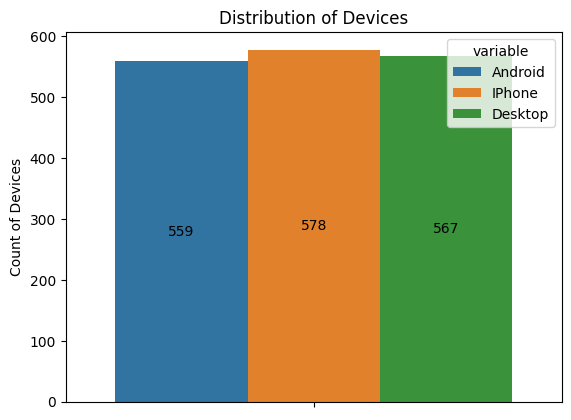

In [83]:
#making a countplot to show the distibution of the devices with the melted dataframe of devices by only using where the column is marked as 1

ax = sns.countplot(data=people_melted.loc[people_melted['value'] == 1], x='value', hue='variable')
#loops over the containers that hold the bars in the plot 
for container in ax.containers:
    #adding the label to each bar
    ax.bar_label(container, label_type = 'center')
plt.title('Distribution of Devices')
plt.xlabel('')
plt.ylabel('Count of Devices')
plt.xticks(visible = False)

The distribution is fairly even with most of Venmito's users having an IPhone at 578 users

Let's visualize where most of the people are concentrated

In [84]:
#importing plotly to graph the map data
import plotly.express as px

In [85]:
#grouping our users by country
people_by_country = people.groupby('Country')['id'].count().reset_index().rename(columns = {'id':'User Count'})
people_by_country

,Country,User Count
0,France,42
1,Spain,26
2,Canada,157
3,USA,704
4,United Kingdom,71


In [95]:
fig = px.scatter_geo(people_by_country,
                    locations="Country", 
                    size = "User Count",
                    locationmode = 'country names',
                    hover_name = 'Country',
                    projection = 'natural earth',
                    title = 'User Distribution by Country')
fig.show()

Most of our users in this dataset are concentrated in the US with the count at 704.


Let's see the distirbution by city

In [86]:
# grouping the users by city to get the count and resetting the index so we start indexing from. Then we rename the id column to user count for clarity
people_by_city = people.groupby('City')['id'].count().reset_index().rename(columns = {'id':'User Count'}).sort_values('User Count')
people_by_city

,City,User Count
0,Barcelona,26
6,Paris,42
4,Montreal,56
2,London,71
9,Toronto,101
1,Chicago,106
5,New York,125
7,San Diego,129
3,Los Angeles,138
8,San Francisco,206


Text(0.5, 1.0, 'Distribution Of Users By City')

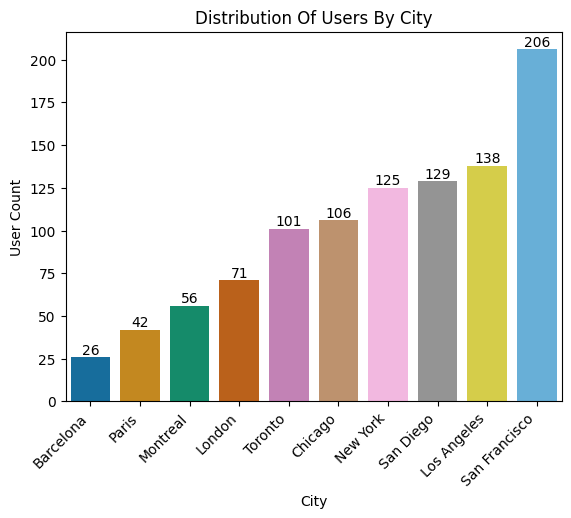

In [98]:
#making the counplot for each city
ax = sns.barplot(x='City', y = 'User Count', data = people_by_city, palette = 'colorblind', hue = 'City')
# adding the values to every box so its easier to interpret
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title('Distribution Of Users By City')

The majority of our users are in the US with a concentration of 206 in San Francisco. The least being in Barcelona. Why? (answered down the line)

## Promotions Exploration

In [87]:
promotions

,id,email,telephone,promotion,responded
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes
4,5,Isobelle.Davidson@example.com,237-295-4490,Popsi,Yes
...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No


Text(0.5, 1.0, 'Promotions Response by Product')

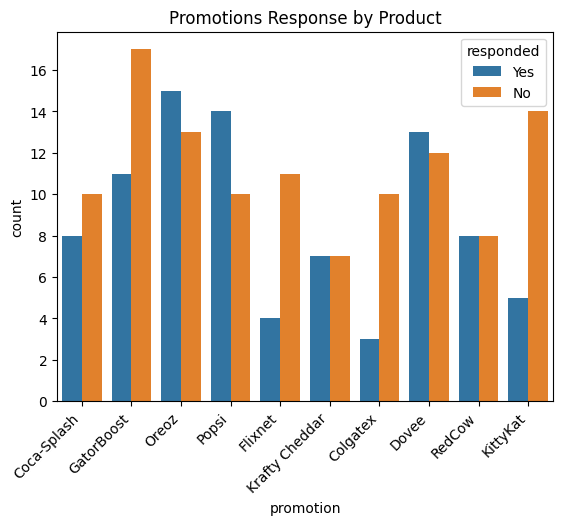

In [88]:
sns.countplot(promotions, x = promotions['promotion'], hue = promotions['responded'])
#rotating the x labels so they are readable
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.title('Promotions Response by Product')

The most successful promotion is for Oreoz and the least successful is Colgatex

To dive deeper into this data we can view the distribution on the promotions by country or by device with the people table

In [89]:
# merging the promotions and people tables on only the columns necessary to analyze the data
promotion_locations = pd.merge(promotions, people[['email', 'City', 'Country', 'Android', 'IPhone', 'Desktop']], on = 'email', how = 'left')

In [90]:
#checking for null values
promotions.isna().sum()

id           0
email        0
telephone    0
promotion    0
responded    0
dtype: int64

In [91]:
promotion_locations

,id,email,telephone,promotion,responded,City,Country,Android,IPhone,Desktop
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes,San Francisco,USA,0,1,1
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes,Toronto,Canada,1,1,1
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes,Chicago,USA,0,1,1
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes,San Diego,USA,1,0,1
4,5,Isobelle.Davidson@example.com,237-295-4490,Popsi,Yes,San Francisco,USA,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,196,Magnus.Mcneil@example.com,125-993-7660,Dovee,No,San Francisco,USA,0,1,1
196,197,Frazer.Anthony@example.com,139-396-1336,Oreoz,No,New York,USA,0,1,1
197,198,Macie.Payne@example.com,782-737-6408,KittyKat,No,New York,USA,1,0,0
198,199,Martin.Perry@example.com,586-420-6418,GatorBoost,No,Paris,France,1,1,0


In [92]:
#checking for missing values and data integrity
promotion_locations.isna().sum()

id           0
email        0
telephone    0
promotion    0
responded    0
City         0
Country      0
Android      0
IPhone       0
Desktop      0
dtype: int64

In [93]:
#retrieving only the successful promotions by country to show where the promotions are performing best
promotion_countries_success = promotion_locations[promotion_locations['responded'] == 'Yes'].groupby('Country')['id'].count().reset_index().rename(columns = {'id':'User Count'})
promotion_countries_success

,Country,User Count
0,France,1
1,Spain,2
2,Canada,9
3,USA,69
4,United Kingdom,7


In [105]:
fig = px.scatter_geo(promotion_countries_success,
                    locations="Country", 
                    size = "User Count",
                    locationmode = 'country names',
                    hover_name = 'Country',
                    projection = 'natural earth',
                    title = 'Successful Promotion Response by Country')
fig.show()

The promotions through Venmito are performing best in the USA with 69 successful promotions.

In [94]:
#retrieving only the rejected promotions by country to show where the promotions could be improved
promotion_countries_failed = promotion_locations[promotion_locations['responded'] == 'No'].groupby('Country')['id'].count().reset_index().rename(columns = {'id':'User Count'})
promotion_countries_failed

,Country,User Count
0,France,4
1,Spain,7
2,Canada,20
3,USA,62
4,United Kingdom,19


In [95]:
fig = px.scatter_geo(promotion_countries_failed,
                    locations="Country", 
                    size = "User Count",
                    locationmode = 'country names',
                    hover_name = 'Country',
                    projection = 'natural earth',
                    title = 'Failed Promotion Response by Country')
fig.show()

The most amount of rejections is in the USA with a total of 62

### Analyzing Promotion by Country

In [96]:
#grouping the data by promotion, country and response to see the ratio of successful promotions
promo_by_country = promotion_locations.groupby(['promotion', 'Country','responded'])['id'].count().reset_index()
promo_by_country

,promotion,Country,responded,id
0,Coca-Splash,Spain,No,1
1,Coca-Splash,Canada,No,1
2,Coca-Splash,USA,No,6
3,Coca-Splash,USA,Yes,8
4,Coca-Splash,United Kingdom,No,2
5,Colgatex,Spain,No,1
6,Colgatex,Canada,No,1
7,Colgatex,USA,No,5
8,Colgatex,USA,Yes,2
9,Colgatex,United Kingdom,No,3


In [97]:
#seeing which products are being promoted
promolist = promo_by_country['promotion'].unique()
promolist

array(['Coca-Splash', 'Colgatex', 'Dovee', 'Flixnet', 'GatorBoost',
       'KittyKat', 'Krafty Cheddar', 'Oreoz', 'Popsi', 'RedCow'],
      dtype=object)

In [98]:
#making a function to graph all the promo by country and response to see 
def chart_by_promo(df, promolist):
    #iterate through promo list
    for promo in promolist:
        #define the figure size
        plt.figure(figsize=(12, 6))
        #filter the dataframe for the current promo and set the axes and response difference
        ax = sns.barplot(data=df[df['promotion'] == promo], x='Country', y='id', hue='responded', palette='deep')
        for container in ax.containers:
            ax.bar_label(container, label_type = 'center')

        plt.title(f'Number of Responses by Country for {promo}')
        plt.xlabel('Country')
        plt.ylabel('Number of Responses')
        plt.show()

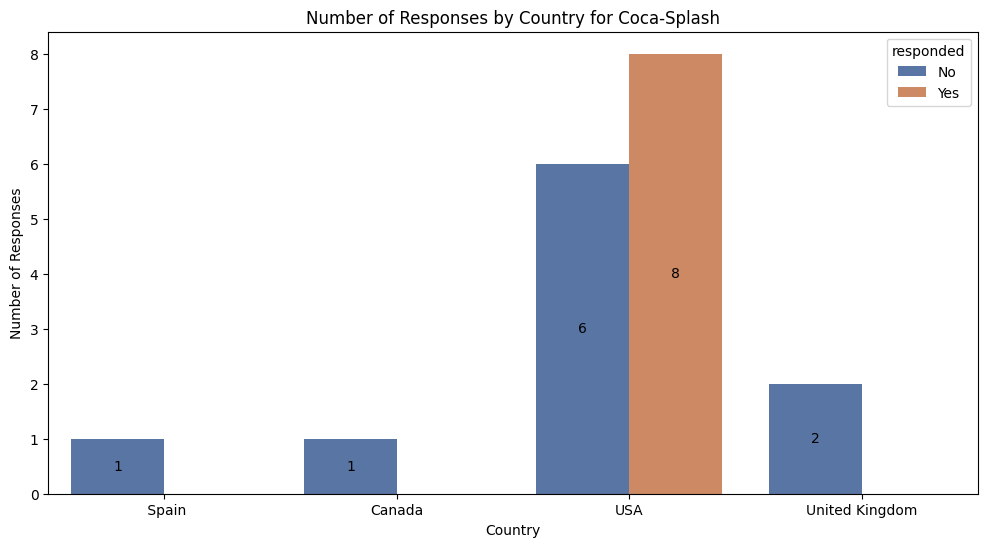

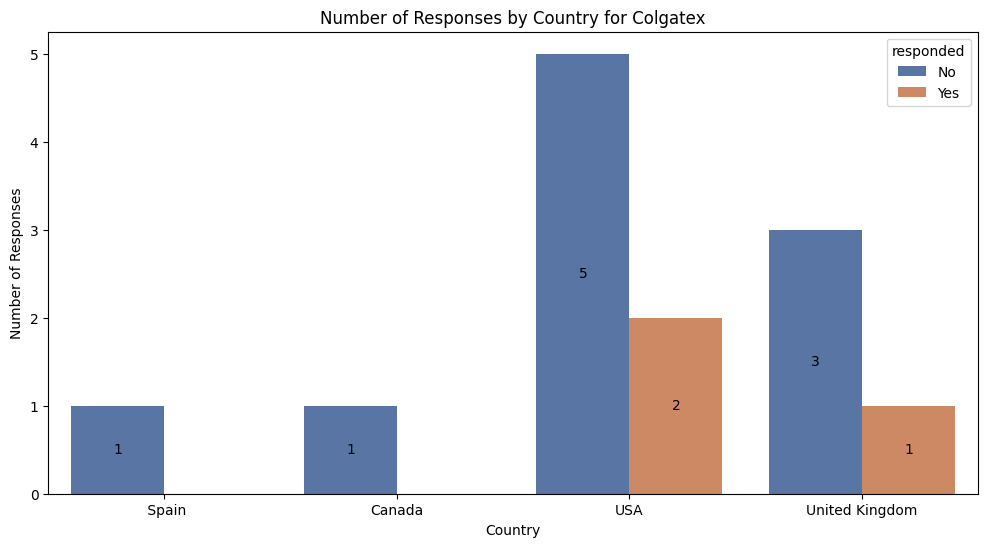

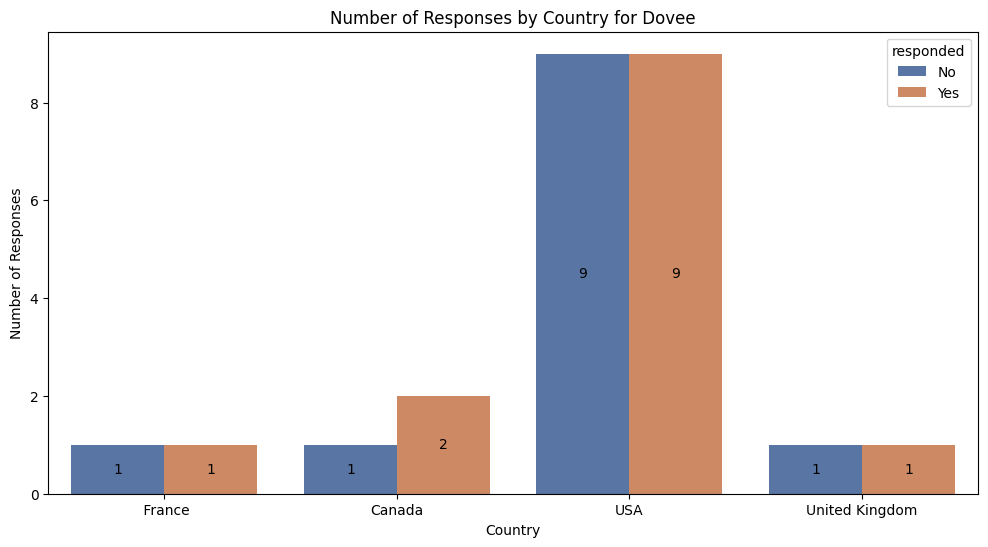

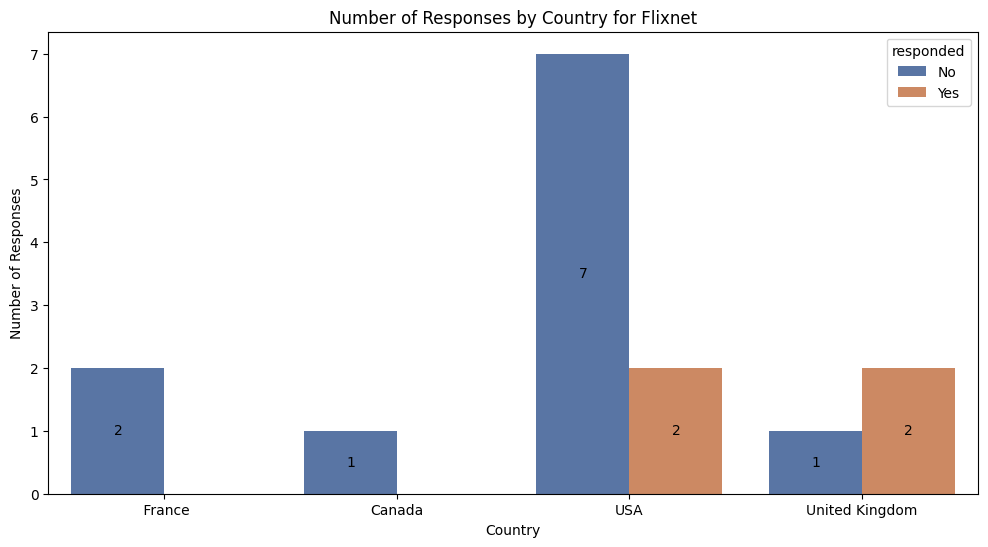

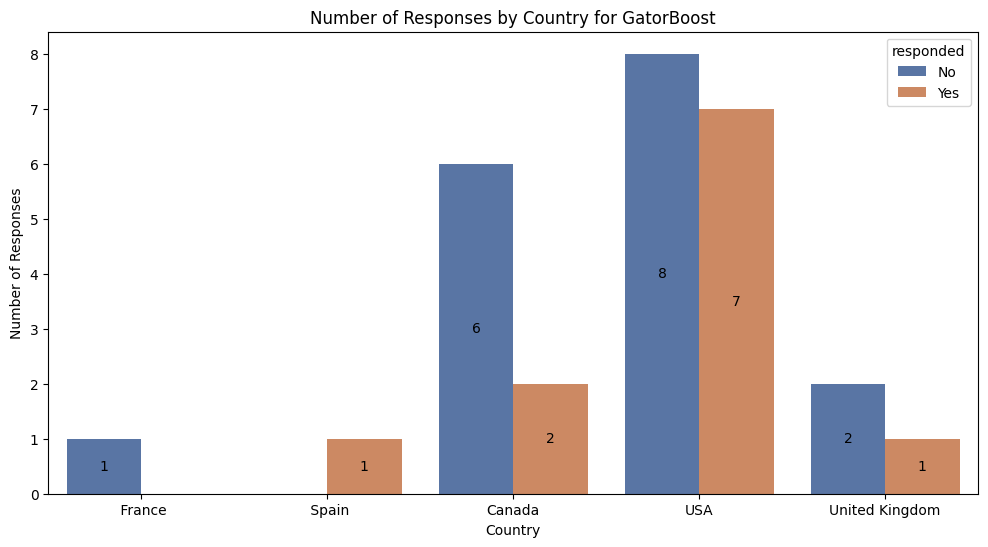

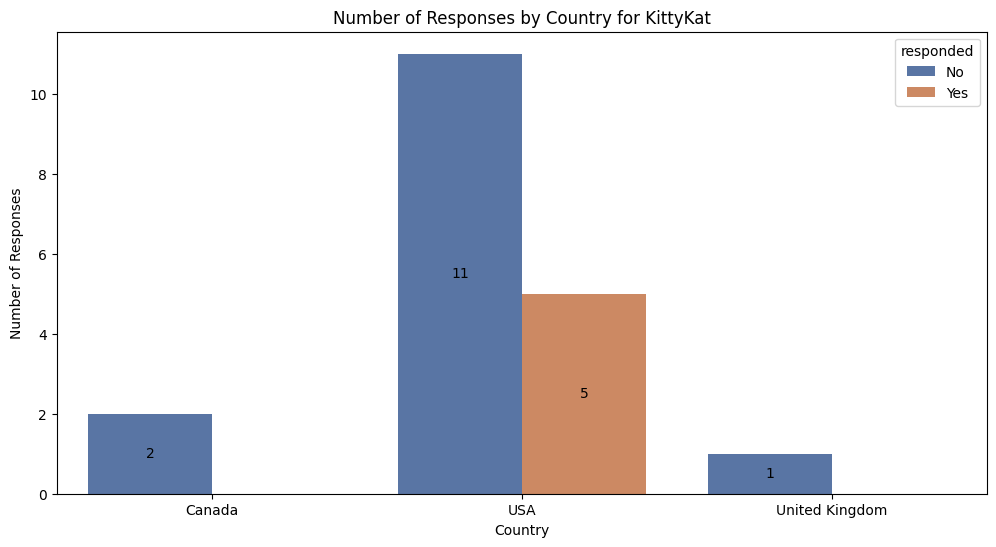

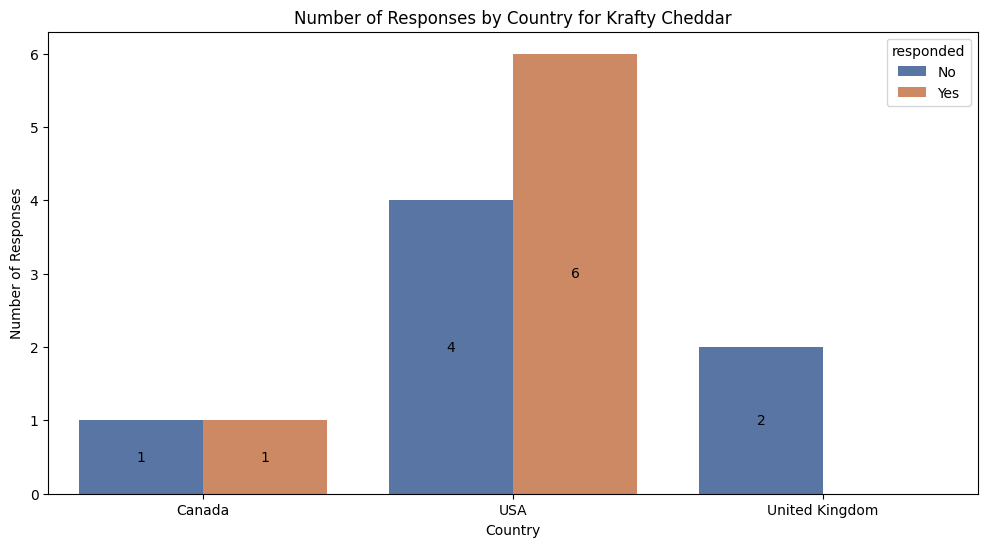

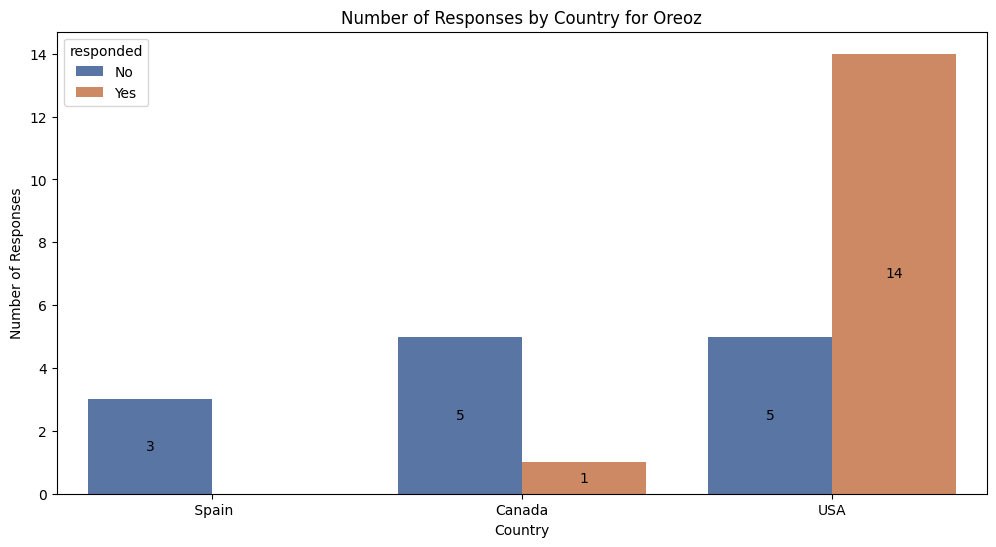

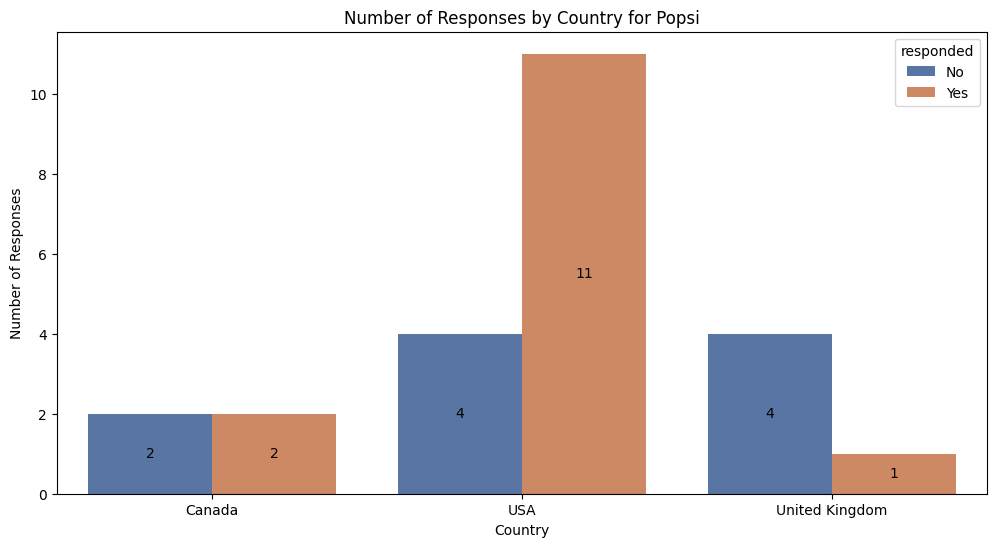

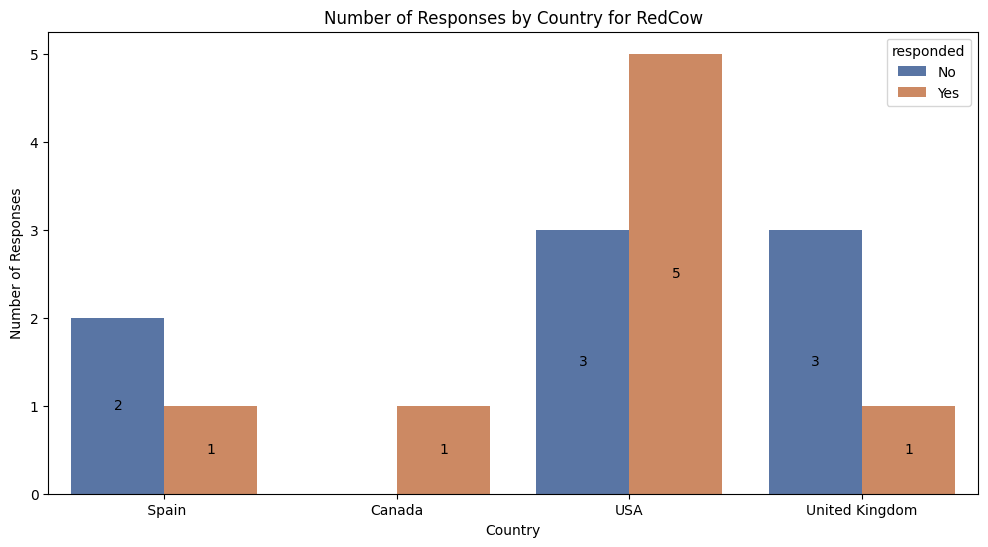

In [99]:
chart_by_promo(promo_by_country, promolist)

The promotions could be doing better in Europe since most of the charts show poor performance in Spain, United Kingdom and Spain. The promotion frequency could be increased by building user profiles that do respond to he promotions

In [100]:
#combining the device responses to graph them easily
promotion_devices_melted = pd.melt(promotion_locations[['Android', 'IPhone', 'Desktop']])
promotion_devices_melted

,variable,value
0,Android,0
1,Android,1
2,Android,0
3,Android,1
4,Android,0
...,...,...
595,Desktop,1
596,Desktop,1
597,Desktop,0
598,Desktop,0


In [101]:
#changing the values to successful or not successful to make it more interpretable for stakeholders by using a lambda function to apply to every row 1 is successful
promotion_devices_melted['value'] = promotion_devices_melted['value'].apply(lambda x: 'Successful' if str(x) == '1' else 'Not Successful')
promotion_devices_melted.rename(columns = {'variable':'Device'}, inplace = True)

Text(0, 0.5, 'Count of Devices')

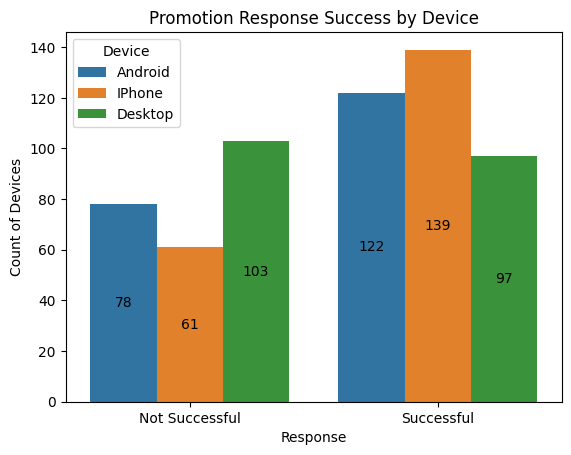

In [102]:
ax = sns.countplot(data=promotion_devices_melted, x='value', hue='Device')
#loops over the containers that hold the bars in the plot 
for container in ax.containers:
    #adding the label to each bar
    ax.bar_label(container, label_type = 'center')
plt.title('Promotion Response Success by Device')
plt.xlabel('Response')
plt.ylabel('Count of Devices')


We can see that the highest success rate from the devices is the IPhone with 139 successful promos

In [103]:
#combining the device responses to get the success rates easily
promotion_devices_rate = pd.melt(promotion_locations[['Android', 'IPhone', 'Desktop']])
promotion_devices_rate

,variable,value
0,Android,0
1,Android,1
2,Android,0
3,Android,1
4,Android,0
...,...,...
595,Desktop,1
596,Desktop,1
597,Desktop,0
598,Desktop,0


In [104]:
promo_device_success = promotion_devices_rate.groupby('variable').sum().reset_index()
promo_device_success

,variable,value
0,Android,122
1,Desktop,97
2,IPhone,139


In [105]:
#grouping by the devices to sum the amount of successful responses
promo_device_success = promotion_devices_rate.groupby('variable').sum().reset_index()
# divide the total amount of successful responses by the amount of promotions sent to get the success rate by device
promo_device_success['value'] = round((promo_device_success['value'] / len(promotion_locations)) * 100, 0)
#renaming columns for interpretability
promo_device_success.rename(columns= {'variable': 'Device', 'value':'Success Rate'})

,Device,Success Rate
0,Android,61.0
1,Desktop,48.0
2,IPhone,70.0


## Transfers Exploration

In [106]:
transfers

,sender_id,recipient_id,amount,date
0,926,531,70.47,2022-01-07
1,280,735,21.88,2022-01-10
2,571,737,44.68,2022-01-13
3,958,945,39.94,2022-01-17
4,373,817,6.98,2022-01-17
...,...,...,...,...
522,487,810,22.60,2024-04-27
523,78,356,30.48,2024-04-27
524,682,888,82.91,2024-04-29
525,463,438,8.80,2024-04-29


In [107]:
#adding a year column
transfers['Year'] = transfers['date'].dt.year
#adding a month column
transfers['Month'] = transfers['date'].dt.month_name()
#adding a quarter column
transfers['Quarter'] = transfers['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')


In [108]:
transfers.head()

,sender_id,recipient_id,amount,date,Year,Month,Quarter
0,926,531,70.47,2022-01-07,2022,January,2022-Q1
1,280,735,21.88,2022-01-10,2022,January,2022-Q1
2,571,737,44.68,2022-01-13,2022,January,2022-Q1
3,958,945,39.94,2022-01-17,2022,January,2022-Q1
4,373,817,6.98,2022-01-17,2022,January,2022-Q1


In [109]:
people

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA
...,...,...,...,...,...,...,...,...,...,...
995,906,Astrid,Miles,473-411-8478,Astrid.Miles@example.com,0,1,1,Paris,France
996,922,Luisa,Haley,916-879-3164,Luisa.Haley@example.com,0,1,1,Barcelona,Spain
997,962,Isobella,Gilbert,717-961-9368,Isobella.Gilbert@example.com,1,0,1,Barcelona,Spain
998,977,Anita,Skinner,885-134-1740,Anita.Skinner@example.com,1,1,0,Barcelona,Spain


We're going to assume that the sender id's in the tranfers table are correspondent to the ids in the people table. We are going to join to get location data. Since we are not sure which device they used their transfer from we are not going to include that

In [110]:
transfers_sent = pd.merge(transfers.rename(columns={'sender_id':'id'}), people[['id', 'City', 'Country', 'email']], on ='id', how = 'left')
transfers_sent

,id,recipient_id,amount,date,Year,Month,Quarter,City,Country,email
0,926,531,70.47,2022-01-07,2022,January,2022-Q1,San Francisco,USA,Ann.John@example.com
1,280,735,21.88,2022-01-10,2022,January,2022-Q1,San Francisco,USA,Zac.Wagner@example.com
2,571,737,44.68,2022-01-13,2022,January,2022-Q1,San Francisco,USA,Keelan.Thompson@example.com
3,958,945,39.94,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Luna.Fowler@example.com
4,373,817,6.98,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Robbie.Paul@example.com
...,...,...,...,...,...,...,...,...,...,...
522,487,810,22.60,2024-04-27,2024,April,2024-Q2,San Francisco,USA,Bernard.Moran@example.com
523,78,356,30.48,2024-04-27,2024,April,2024-Q2,London,United Kingdom,Angela.Mcmillan@example.com
524,682,888,82.91,2024-04-29,2024,April,2024-Q2,Los Angeles,USA,Laura.Valdez@example.com
525,463,438,8.80,2024-04-29,2024,April,2024-Q2,San Diego,USA,Tristan.Lambert@example.com


In [111]:
transfers_received =  pd.merge(transfers.rename(columns={'recipient_id':'id'}), people[['id', 'City', 'Country', 'email']], on ='id', how = 'left')
transfers_received

,sender_id,id,amount,date,Year,Month,Quarter,City,Country,email
0,926,531,70.47,2022-01-07,2022,January,2022-Q1,San Francisco,USA,Jake.Salazar@example.com
1,280,735,21.88,2022-01-10,2022,January,2022-Q1,Los Angeles,USA,Shane.Wheeler@example.com
2,571,737,44.68,2022-01-13,2022,January,2022-Q1,San Francisco,USA,Kiara.Bell@example.com
3,958,945,39.94,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Elisha.Owens@example.com
4,373,817,6.98,2022-01-17,2022,January,2022-Q1,San Diego,USA,Renee.Mullen@example.com
...,...,...,...,...,...,...,...,...,...,...
522,487,810,22.60,2024-04-27,2024,April,2024-Q2,San Francisco,USA,Syed.Mooney@example.com
523,78,356,30.48,2024-04-27,2024,April,2024-Q2,Toronto,Canada,Romeo.Martin@example.com
524,682,888,82.91,2024-04-29,2024,April,2024-Q2,San Diego,USA,Liana.Baldwin@example.com
525,463,438,8.80,2024-04-29,2024,April,2024-Q2,Chicago,USA,Leslie.Harrington@example.com


In [112]:
#checking for missing ids
transfers_sent['id'].isna().sum()

0

In [113]:
#checking for missing ids
transfers_received['id'].isna().sum()

0

No missing ids in either table. With this information we can use the information provided by the people to answer questions like: 


where is the most money being sent? 


where do we have most active users? 


when do transactions happen most?


who is our most active user? who has sent the most money in this quarter?

What is the retention rate month over month?

Lets start by putting the sender emails and countries together with the receiver email and countries

In [114]:
# joining the sender information with the recipient information
transfers = pd.concat([transfers_sent.rename(columns={'City':'Sender City', 
                                                    'Country':'Sender Country', 
                                                    'email':'Sender Email',
                                                    'id': 'sender_id'}), 
                    transfers_received[['City','Country','email']].rename(columns={'City':'Receiver City',
                                        'Country':'Receiver Country', 
                                        'email':'Receiver email'})], axis = 1)

In [115]:
transfers

,sender_id,recipient_id,amount,date,Year,Month,Quarter,Sender City,Sender Country,Sender Email,Receiver City,Receiver Country,Receiver email
0,926,531,70.47,2022-01-07,2022,January,2022-Q1,San Francisco,USA,Ann.John@example.com,San Francisco,USA,Jake.Salazar@example.com
1,280,735,21.88,2022-01-10,2022,January,2022-Q1,San Francisco,USA,Zac.Wagner@example.com,Los Angeles,USA,Shane.Wheeler@example.com
2,571,737,44.68,2022-01-13,2022,January,2022-Q1,San Francisco,USA,Keelan.Thompson@example.com,San Francisco,USA,Kiara.Bell@example.com
3,958,945,39.94,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Luna.Fowler@example.com,Los Angeles,USA,Elisha.Owens@example.com
4,373,817,6.98,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Robbie.Paul@example.com,San Diego,USA,Renee.Mullen@example.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,487,810,22.60,2024-04-27,2024,April,2024-Q2,San Francisco,USA,Bernard.Moran@example.com,San Francisco,USA,Syed.Mooney@example.com
523,78,356,30.48,2024-04-27,2024,April,2024-Q2,London,United Kingdom,Angela.Mcmillan@example.com,Toronto,Canada,Romeo.Martin@example.com
524,682,888,82.91,2024-04-29,2024,April,2024-Q2,Los Angeles,USA,Laura.Valdez@example.com,San Diego,USA,Liana.Baldwin@example.com
525,463,438,8.80,2024-04-29,2024,April,2024-Q2,San Diego,USA,Tristan.Lambert@example.com,Chicago,USA,Leslie.Harrington@example.com


What is the date range of the data?

In [116]:
print(f'The earliest date is: {transfers['date'].min()} \nThe latest date is: {transfers['date'].max()}')

The earliest date is: 2022-01-07 00:00:00 
The latest date is: 2024-04-30 00:00:00


In [117]:
def barplot(df, x, y, title, hue = None, label_type = None):
    ax = sns.barplot(data=df, x = x, y = y, hue = hue, palette = 'dark')
    #loops over the containers that hold the bars in the plot 
    for container in ax.containers:
        #adding the label to each bar
        ax.bar_label(container, label_type = 'edge')
    plt.title(title)
    plt.xticks(rotation = 45, horizontalalignment = 'right')
    plt.show()

Where is the most money being sent?

In [118]:
transfers_country = transfers.groupby('Receiver Country')['amount'].sum().sort_values().reset_index()
transfers_country

,Receiver Country,amount
0,Spain,90.66
1,France,575.02
2,United Kingdom,1140.15
3,Canada,2116.26
4,USA,15265.78


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




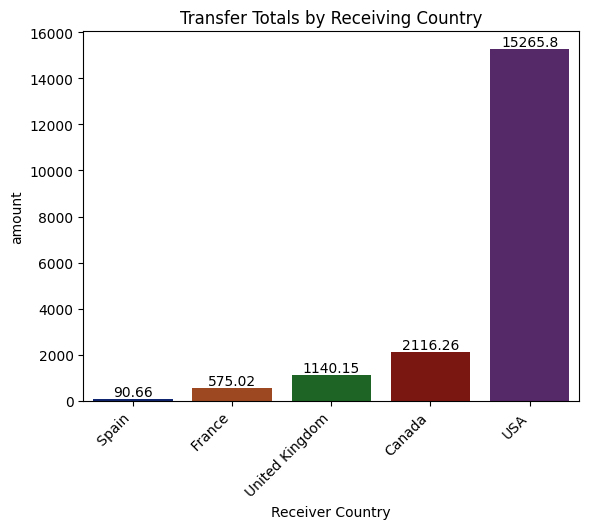

In [119]:
barplot(transfers_country, 'Receiver Country', 'amount', 'Transfer Totals by Receiving Country')

Where are sending users most active?

In [120]:
transfers_sender_activity = transfers.groupby('Sender Country')['sender_id'].count().sort_values().reset_index()
transfers_sender_activity

,Sender Country,sender_id
0,France,5
1,Spain,7
2,United Kingdom,10
3,Canada,80
4,USA,425


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




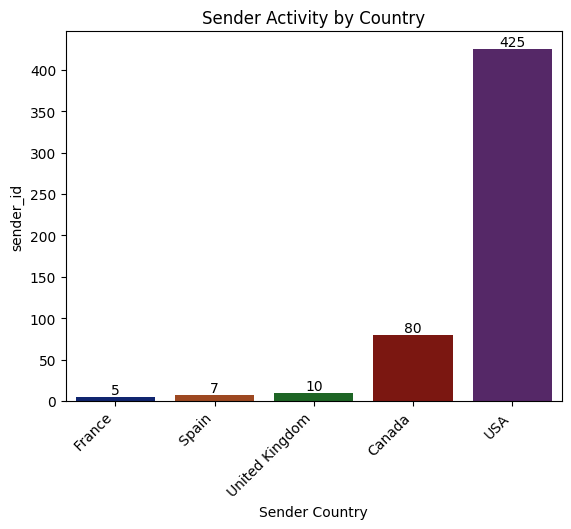

In [121]:
barplot(transfers_sender_activity, 'Sender Country', 'sender_id', 'Sender Activity by Country')

From which country is most money being sent?

In [122]:
transfers_sender_amounts = transfers.groupby('Sender Country')['amount'].sum().sort_values().reset_index()
transfers_sender_amounts

,Sender Country,amount
0,France,351.24
1,Spain,501.87
2,United Kingdom,905.96
3,Canada,2103.19
4,USA,15325.61


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




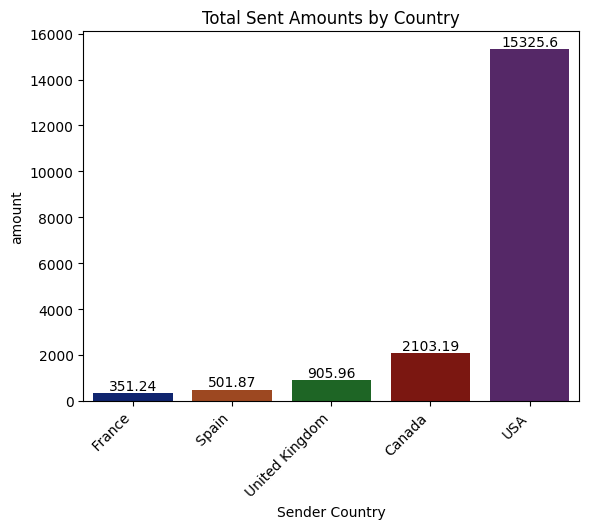

In [123]:
barplot(transfers_sender_amounts, 'Sender Country', 'amount', 'Total Sent Amounts by Country')

What is the mean sent transfer per country?

In [124]:
transfer_avg_sent = transfers.groupby('Sender Country')['amount'].mean().round(2).sort_values().reset_index()
transfer_avg_sent

,Sender Country,amount
0,Canada,26.29
1,USA,36.06
2,France,70.25
3,Spain,71.70
4,United Kingdom,90.60


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




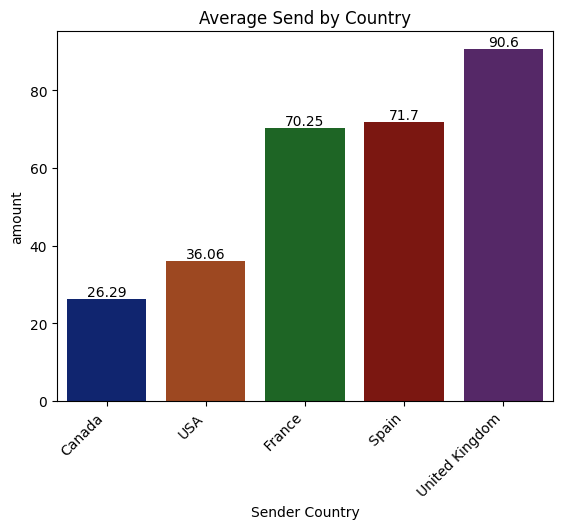

In [125]:
barplot(transfer_avg_sent, 'Sender Country', 'amount', 'Average Send by Country')

What is the mean received amount per country?

In [126]:
transfer_avg_received = transfers.groupby('Receiver Country')['amount'].mean().sort_values().reset_index()
transfer_avg_received

,Receiver Country,amount
0,Canada,26.453250
1,Spain,30.220000
2,USA,35.835164
3,United Kingdom,87.703846
4,France,115.004000


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




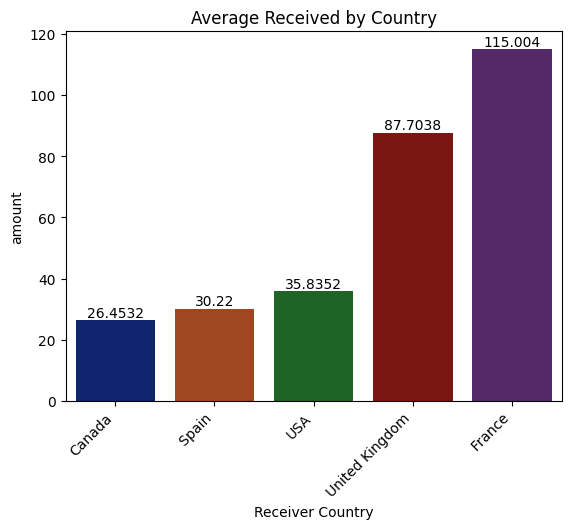

In [127]:
barplot(transfer_avg_received, 'Receiver Country', 'amount', 'Average Received by Country')

What is the amount of activity by users per year? 

In [128]:
transfers_year = transfers.groupby('Year')['sender_id'].count().sort_values().reset_index().rename(columns = {'sender_id': 'Amount of Transfers'})
transfers_year

,Year,Amount of Transfers
0,2024,112
1,2022,156
2,2023,259


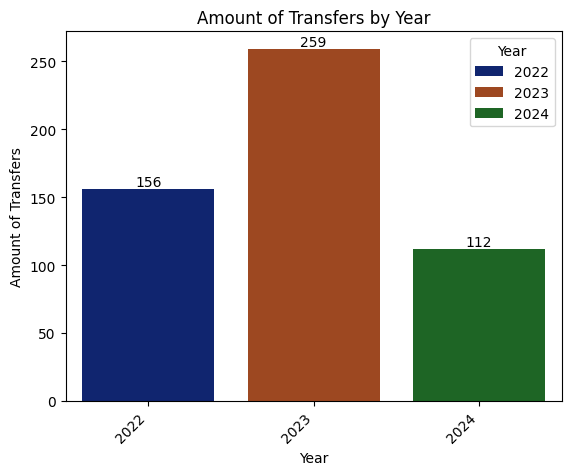

In [129]:
barplot(transfers_year, 'Year', 'Amount of Transfers', 'Amount of Transfers by Year', hue = 'Year')

This might be worrying since the amount of transactions for the current year is significantly less than last year. This might mean that there isn't much growth. Since the range of data is only up to April 30 for 2024, we would want to know if there was growth from the previous year by the same time. 

when can we expect there to be an increase in transfers?

In [130]:
#making a month orders list to order months by the calendar
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

In [131]:
#verifying the amount of transactions sent by month in 2023

transfers_by_month_2023 = transfers[transfers['Year'] == 2023].groupby('Month')['sender_id'].count().reset_index().rename(columns = {'sender_id':'Amount of Transfers'})
#ordering the month column by month order list
transfers_by_month_2023['Month'] = pd.Categorical(
    transfers_by_month_2023['Month'], 
    categories=month_order, 
    ordered=True
)
transfers_by_month_2023 = transfers_by_month_2023.sort_values('Month')
transfers_by_month_2023

,Month,Amount of Transfers
4,January,25
3,February,19
7,March,19
0,April,19
8,May,23
6,June,25
5,July,13
1,August,24
11,September,21
10,October,31


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




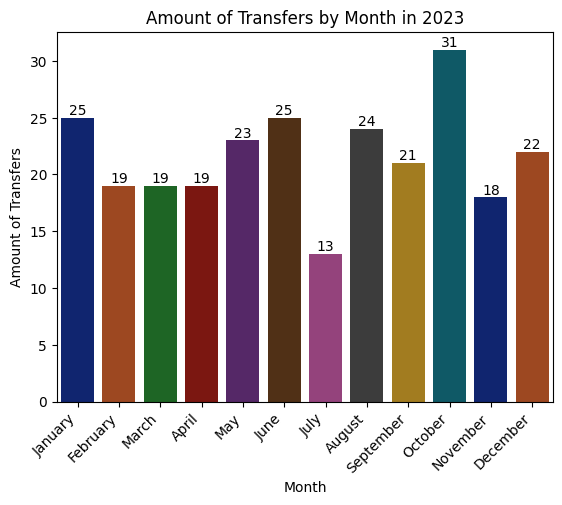

In [132]:
barplot(transfers_by_month_2023, 'Month', 'Amount of Transfers', 'Amount of Transfers by Month in 2023')

In 2023, the most transfers were sent in October followed by January. To answer why this is the case, a teammember would need to know what happened in October. Usually, Halloween happens in October where people might want to spend money on candy and costumes. Another assumption is that there may have been a disaster that happened and users needed to send money to their loved ones

We can check in which country was the most of transfers to see the distribution

In [133]:
#using the sneder country here since we want to see where the most amount of transfers were sent out of
transfers_by_month_country_2023 = transfers[transfers['Year'] == 2023].groupby(['Month', 'Sender Country'])['sender_id'].count().reset_index().rename(columns = {'sender_id':'Amount of Transfers'})
transfers_by_month_country_2023['Month'] = pd.Categorical(
    transfers_by_month_country_2023['Month'], 
    categories=month_order, 
    ordered=True
)
transfers_by_month_country_2023 = transfers_by_month_country_2023.sort_values('Month')
transfers_by_month_country_2023

,Month,Sender Country,Amount of Transfers
8,January,Canada,5
9,January,USA,20
6,February,Canada,2
7,February,USA,17
15,March,USA,13
14,March,Canada,6
0,April,Canada,3
1,April,USA,16
17,May,USA,19
16,May,Canada,4


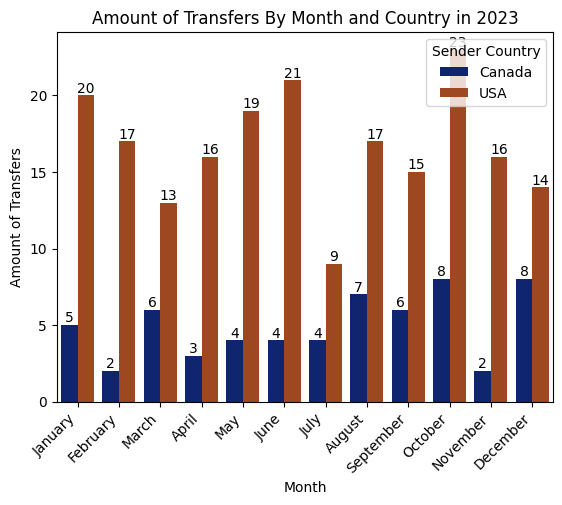

In [134]:
barplot(transfers_by_month_country_2023, 'Month', 'Amount of Transfers', 'Amount of Transfers By Month and Country in 2023', hue = 'Sender Country', )

We can see the distribution of transfers in our most active year was only in North America. 

Let's compare to curent year to see the trend

In [135]:
transfers_by_year_country = transfers.groupby(['Year', 'Receiver Country'])['sender_id'].count().reset_index().sort_values('Year', ascending = False).rename(columns = {'sender_id':'Amount of Transfers'})
transfers_by_year_country

,Year,Receiver Country,Amount of Transfers
3,2024,France,5
4,2024,Spain,3
5,2024,Canada,23
6,2024,USA,68
7,2024,United Kingdom,13
1,2023,Canada,57
2,2023,USA,202
0,2022,USA,156


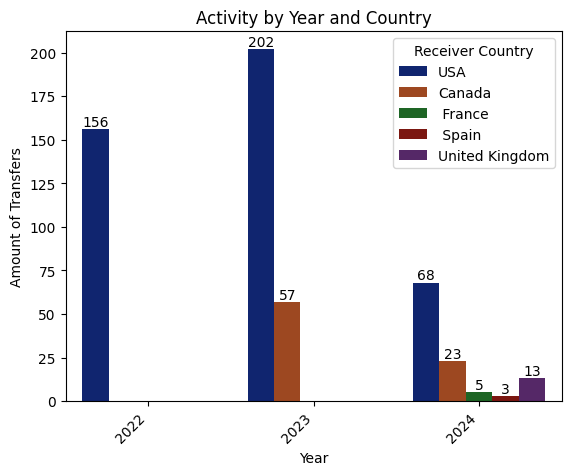

In [136]:
barplot(transfers_by_year_country, 'Year', 'Amount of Transfers', 'Activity by Year and Country', hue = 'Receiver Country')

We can see the growth of Venmito into different countries which does signal growth horizontally, meaning means we are expanding our user base

Lets see it by month in 2024

In [137]:
transfers_by_month_country_2024 = transfers[transfers['Year'] == 2024].groupby(['Month', 'Receiver Country'])['sender_id'].count().reset_index().sort_values('Month', ascending = False).rename(columns = {'sender_id':'Amount of Transfers'})
transfers_by_month_country_2024['Month'] = pd.Categorical(
    transfers_by_month_country_2024['Month'],
    categories= month_order[:4],
    ordered = True
)
transfers_by_month_country_2024 = transfers_by_month_country_2024.sort_values('Month')
transfers_by_month_country_2024

,Month,Receiver Country,Amount of Transfers
8,January,France,3
9,January,Spain,1
10,January,Canada,11
11,January,USA,17
5,February,Canada,3
6,February,USA,17
7,February,United Kingdom,4
12,March,Spain,1
13,March,Canada,4
14,March,USA,18


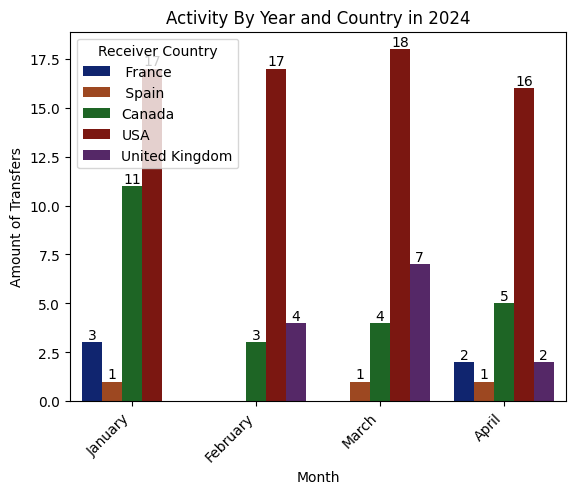

In [138]:
barplot(transfers_by_month_country_2024, 'Month', 'Amount of Transfers', 'Activity By Year and Country in 2024', hue = 'Receiver Country')

From this chart we tell that the distribution across countries is growing

What is the trend by quarter?

In [139]:
transfer_quarters = transfers.groupby('Quarter')['sender_id'].count().reset_index().sort_values('Quarter').rename(columns= {'sender_id':"Amount of Transfers"})
transfer_quarters

,Quarter,Amount of Transfers
0,2022-Q1,37
1,2022-Q2,36
2,2022-Q3,36
3,2022-Q4,47
4,2023-Q1,63
5,2023-Q2,67
6,2023-Q3,58
7,2023-Q4,71
8,2024-Q1,86
9,2024-Q2,26


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




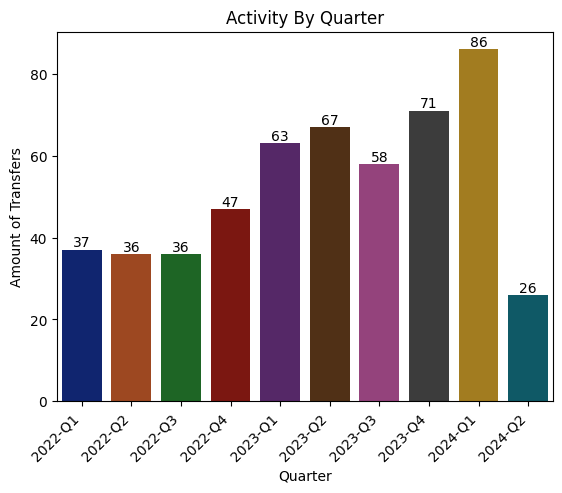

In [140]:
barplot(transfer_quarters, 'Quarter', 'Amount of Transfers', 'Activity By Quarter')

Q1 of 2024 has been the most active in the range of this data

What is the retention of users per month(how many users are consistently making a transfer to a person?) What is the churn rate (how many users become inactive within a month?)

In [141]:
transfers.head()

,sender_id,recipient_id,amount,date,Year,Month,Quarter,Sender City,Sender Country,Sender Email,Receiver City,Receiver Country,Receiver email
0,926,531,70.47,2022-01-07,2022,January,2022-Q1,San Francisco,USA,Ann.John@example.com,San Francisco,USA,Jake.Salazar@example.com
1,280,735,21.88,2022-01-10,2022,January,2022-Q1,San Francisco,USA,Zac.Wagner@example.com,Los Angeles,USA,Shane.Wheeler@example.com
2,571,737,44.68,2022-01-13,2022,January,2022-Q1,San Francisco,USA,Keelan.Thompson@example.com,San Francisco,USA,Kiara.Bell@example.com
3,958,945,39.94,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Luna.Fowler@example.com,Los Angeles,USA,Elisha.Owens@example.com
4,373,817,6.98,2022-01-17,2022,January,2022-Q1,Los Angeles,USA,Robbie.Paul@example.com,San Diego,USA,Renee.Mullen@example.com


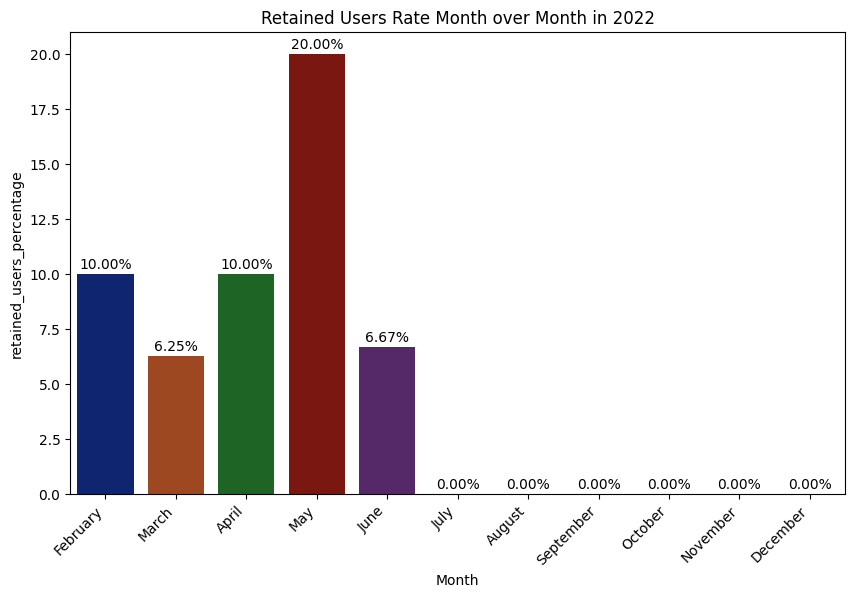

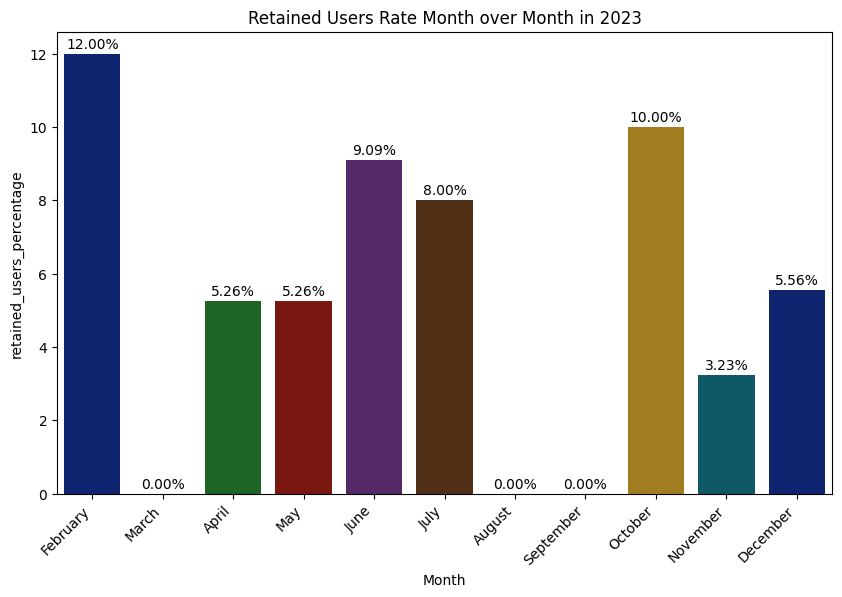

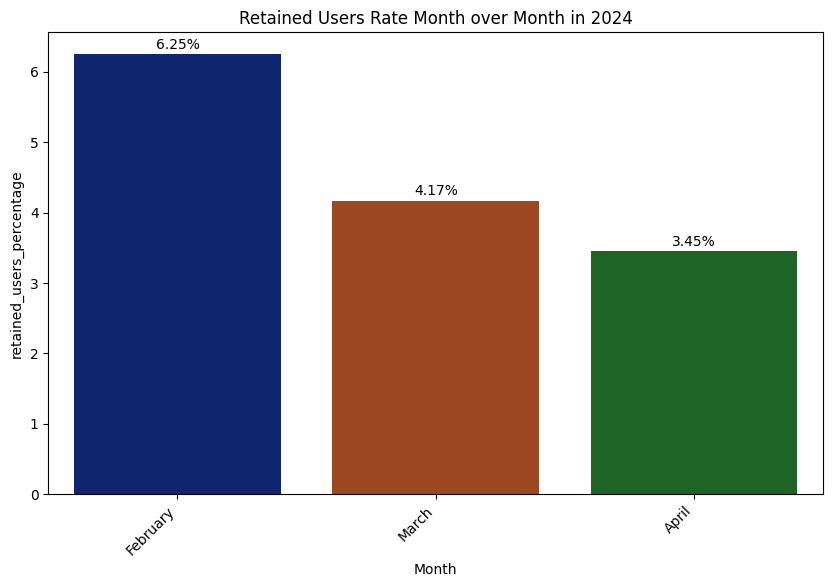

,Month,retained_users_percentage,Year,retained_users,previous_month_users
0,February,10.00,2022,1,10
1,March,6.25,2022,1,16
2,April,10.00,2022,1,10
3,May,20.00,2022,1,5
4,June,6.67,2022,1,15


In [142]:
# initialize a DataFrame to hold consecutive retention data
consecutive_retention_month_data = pd.DataFrame()

# creating a list of years we want to look at
years = transfers['Year'].unique()

# iterate through each year to calculate consecutive retention
for year in years:
    # filter for the year we want to see
    year_data = transfers[transfers['Year'] == year]
    # storing the users that were active in the month in a dictionary
    monthly_active_users = year_data.groupby('Month')['sender_id'].apply(set).to_dict()
    # get all the months in order for the year
    months = sorted(monthly_active_users.keys(), key=lambda x: month_order.index(x))
    # initialize a list to track retention percentages for the current year
    retention_percentages = []
    # initialize the count of users retained from the previous month starting with January of each year
    retained_from_previous_month = len(monthly_active_users[months[0]])
    
    # calculating the amount of users that come to the app month by month
    for i in range(1, len(months)):
        # current and previous month active users
        current_month_users = monthly_active_users[months[i]]
        previous_month_users = monthly_active_users[months[i - 1]]
        
        # calculate users retained from the previous month by using a set to eliminate duplicate ids and using the intersection to get the common ids from the previous month
        retained_users = len(current_month_users.intersection(previous_month_users))
        
        # calculate retention percentage based on the previous month's active users
        retention_percentage = round((retained_users / retained_from_previous_month) * 100, 2)
        
        # append data to the retention percentages list
        retention_percentages.append({
            'Month': months[i],
            'retained_users_percentage': retention_percentage,
            'Year': year,
            'retained_users': retained_users,
            'previous_month_users': retained_from_previous_month
        })
        
        # update the count of retained users for the next iteration
        retained_from_previous_month = len(current_month_users)
    
    # convert list of retention percentages to a DataFrame
    retention_percentages_df = pd.DataFrame(retention_percentages)
    
    # show the distribution for each month by year
    plt.figure(figsize=(10, 6))  
    # create a new figure for each year
    ax = sns.barplot(data=retention_percentages_df, x='Month', y='retained_users_percentage', hue='Month', palette = 'dark')
    
    # add bar labels
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{v:.2f}%' for v in container.datavalues], padding=2)
    
    # add title and format x-ticks
    plt.title(f'Retained Users Rate Month over Month in {year}')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()
    
    # concatenate with the main consecutive retention DataFrame
    consecutive_retention_month_data = pd.concat([consecutive_retention_month_data, retention_percentages_df], ignore_index=True)

# show consecutive retention data
consecutive_retention_month_data.head()

Extremely low retention rate month over month which would be worth analyzing our promotion and retention efforts to keep users engaged with Venmito

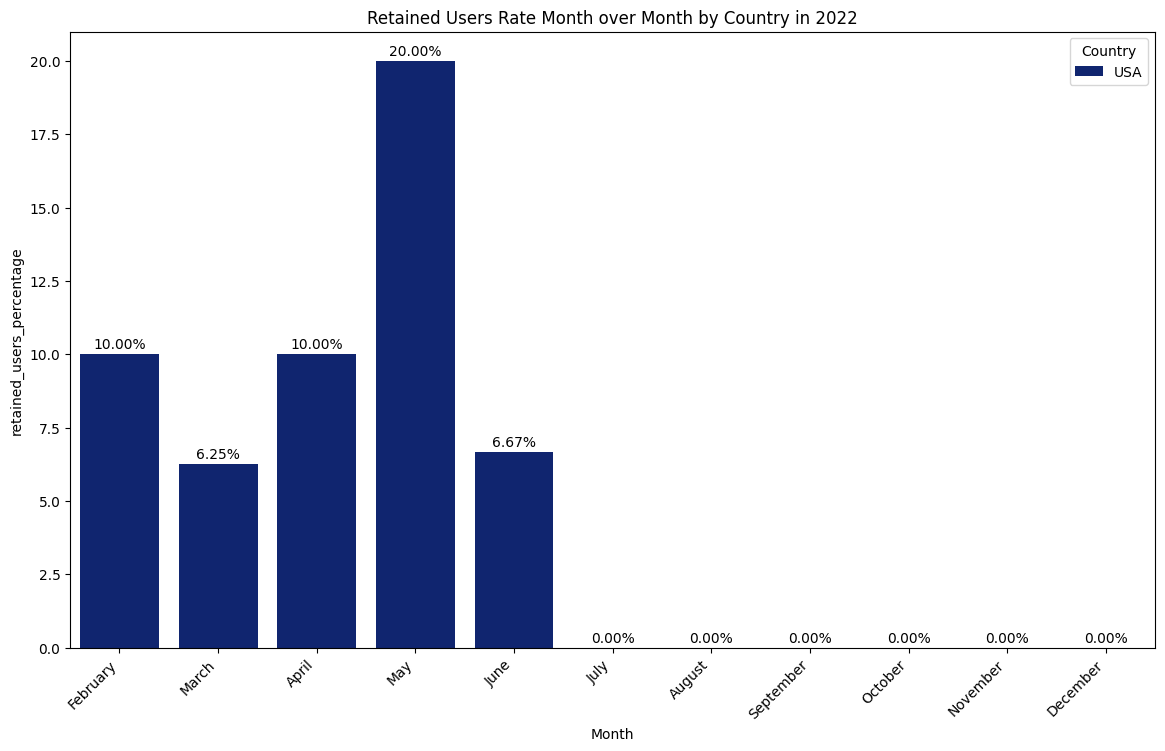

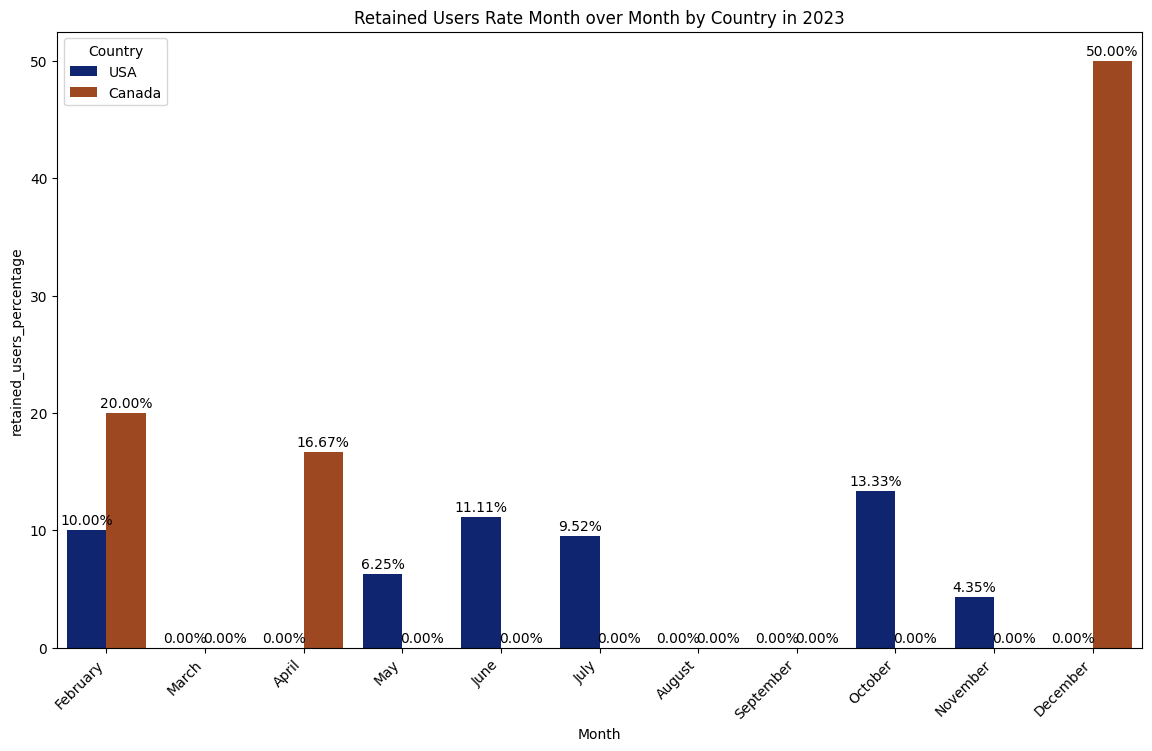

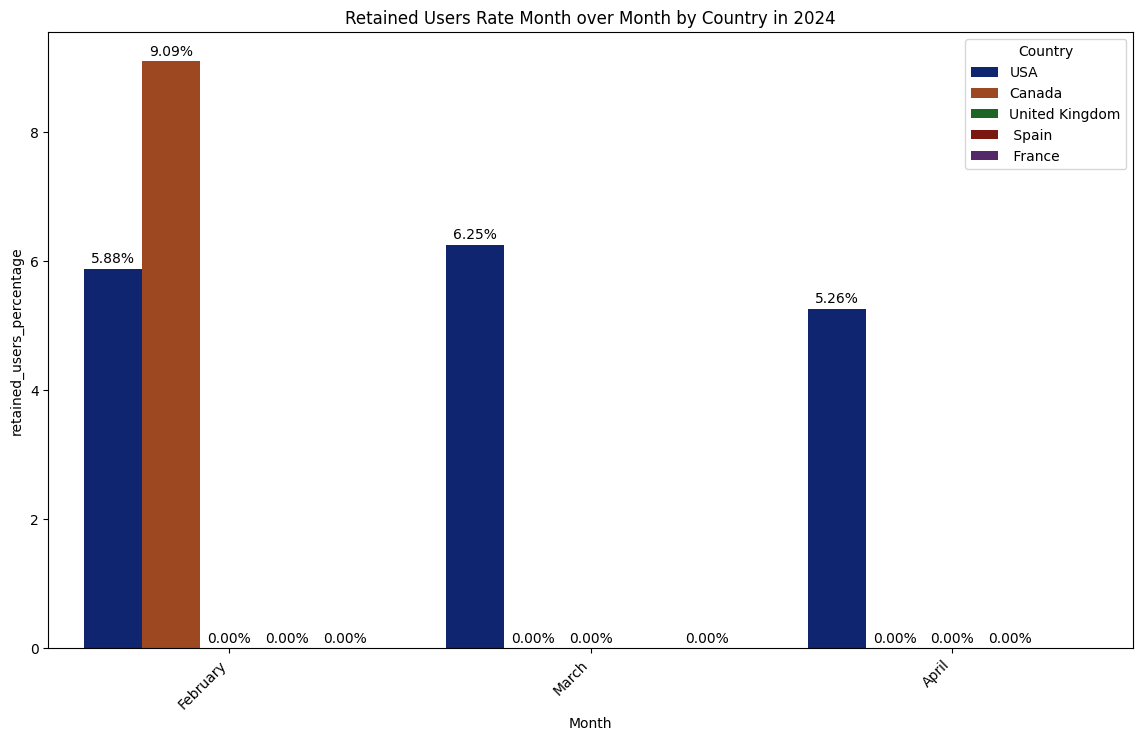

,Country,Month,retained_users_percentage,Year,retained_users,previous_month_users
0,USA,February,10.00,2022,1,10
1,USA,March,6.25,2022,1,16
2,USA,April,10.00,2022,1,10
3,USA,May,20.00,2022,1,5
4,USA,June,6.67,2022,1,15


In [143]:
# initialize a DataFrame to hold consecutive retention data by country
consecutive_retention_country_data = pd.DataFrame()

# create a list of unique years present in the data
years = transfers['Year'].unique()

# iterate through each year to calculate consecutive retention
for year in years:
    # create an empty list to collect data for all countries in the current year
    yearly_retention_data = []
    
    # get unique countries for the current year
    countries = transfers[transfers['Year'] == year]['Sender Country'].unique()
    
    for country in countries:
        # filter transactions for the given year and country
        year_country_data = transfers[(transfers['Year'] == year) & (transfers['Sender Country'] == country)]
        
        # create a dictionary to store active users for each month
        monthly_active_users = year_country_data.groupby('Month')['sender_id'].apply(set).to_dict()
        
        # get all the months in order for the year using the month order list
        months = sorted(monthly_active_users.keys(), key=lambda x: month_order.index(x))
        
        # initialize a list to track retention percentages for the current year and country
        retention_percentages = []
        
        # initialize the count of users retained from the previous month
        retained_from_previous_month = len(monthly_active_users[months[0]])
        
        # calculate consecutive retention
        for i in range(1, len(months)):
            # current and previous month active users
            current_month_users = monthly_active_users[months[i]]
            previous_month_users = monthly_active_users[months[i - 1]]
            
            # calculate users retained from the previous month
            retained_users = len(current_month_users.intersection(previous_month_users))
            
            # calculate retention percentage based on the previous month's active users
            retention_percentage = round((retained_users / retained_from_previous_month) * 100, 2)
            
            # append data to the retention percentages list
            retention_percentages.append({
                'Country': country,
                'Month': months[i],
                'retained_users_percentage': retention_percentage,
                'Year': year,
                'retained_users': retained_users,
                'previous_month_users': retained_from_previous_month
            })
            
            # update the count of retained users for the next iteration
            retained_from_previous_month = len(current_month_users)
        
        # add this country's retention data to the yearly list
        yearly_retention_data.extend(retention_percentages)
    
    # convert list of retention percentages to a DataFrame for the current year
    retention_percentages_df = pd.DataFrame(yearly_retention_data)
    
    # show the distribution for each month by year with countries differentiated by color
    plt.figure(figsize=(14, 8)) 
    ax = sns.barplot(data=retention_percentages_df, x='Month', y='retained_users_percentage', hue='Country',palette = 'dark')
    
    # add bar labels
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{v:.2f}%' for v in container.datavalues], padding=2)
    
    # add title and format x-ticks
    plt.title(f'Retained Users Rate Month over Month by Country in {year}')
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.show()
    
    # concatenate with the main consecutive retention DataFrame
    consecutive_retention_country_data = pd.concat([consecutive_retention_country_data, retention_percentages_df], ignore_index=True)

# show consecutive retention data
consecutive_retention_country_data.head()


Its seems like an inmense area of opportunity to figure out why there is such a low retention rate month over month for the users to increase activity ad growth for Venmito

In [144]:
consecutive_retention_country_data


,Country,Month,retained_users_percentage,Year,retained_users,previous_month_users
0,USA,February,10.00,2022,1,10
1,USA,March,6.25,2022,1,16
2,USA,April,10.00,2022,1,10
3,USA,May,20.00,2022,1,5
4,USA,June,6.67,2022,1,15
5,USA,July,0.00,2022,0,15
6,USA,August,0.00,2022,0,14
7,USA,September,0.00,2022,0,9
8,USA,October,0.00,2022,0,13
9,USA,November,0.00,2022,0,14


In [145]:
#saving for viz use in Tableau
consecutive_retention_country_data.to_csv('RetentionByMonthCountry.csv', index = False)

What is the amount of money being sent by year?

In [146]:
money_sent_years = transfers.groupby('Year')['amount'].sum().reset_index().sort_values('Year')
money_sent_years

,Year,amount
0,2022,5337.26
1,2023,8973.79
2,2024,4876.82


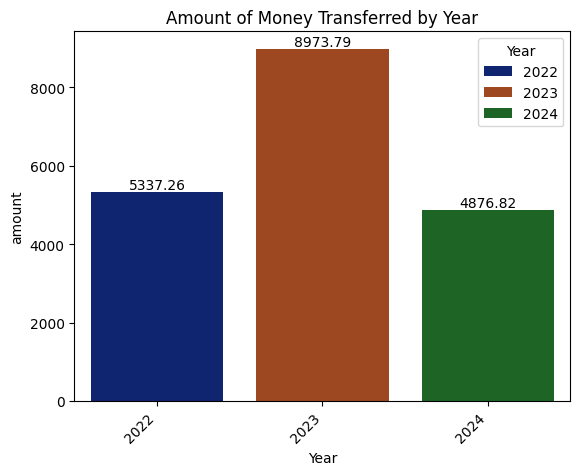

In [147]:
barplot(money_sent_years, 'Year', 'amount', 'Amount of Money Transferred by Year', hue = 'Year')

What is the amount of money being sent by month for each year?

In [148]:
years = transfers['Year'].unique()
def money_by_month(df):
    for year in years:
        money_sent_by_month = df[df['Year'] == year].copy()
        money_sent_by_month['Month'] = pd.Categorical(money_sent_by_month['Month'], categories=month_order, ordered=True)
        money_sent_by_month = money_sent_by_month.groupby('Month')['amount'].sum().reset_index().sort_values('Month')
        ax = sns.barplot(data = money_sent_by_month, x = 'Month', y = 'amount', hue = 'Month')
        for container in ax.containers:
            ax.bar_label(container, rotation = 90, padding = 2, label_type = 'center')
        plt.title(f'Money Transferred by Month in {year}')
        plt.xticks(rotation = 45, horizontalalignment = 'right')
        plt.show()

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/929732412.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



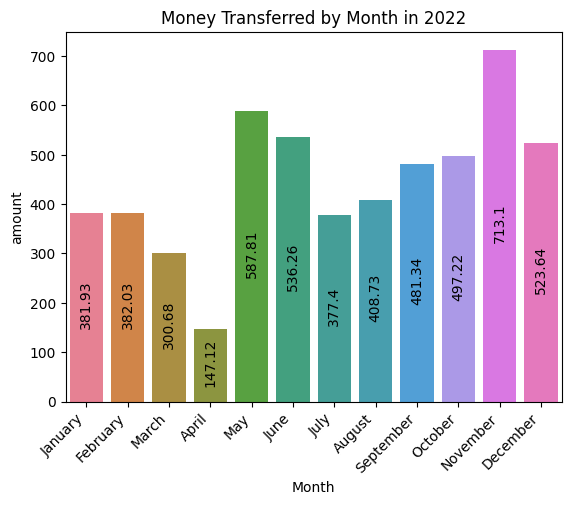

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/929732412.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



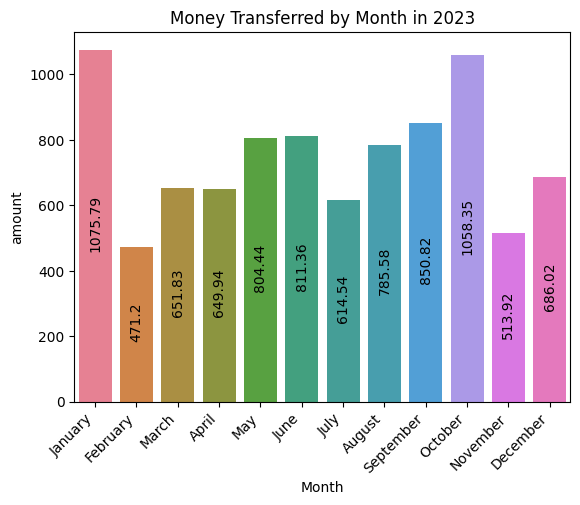

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/929732412.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



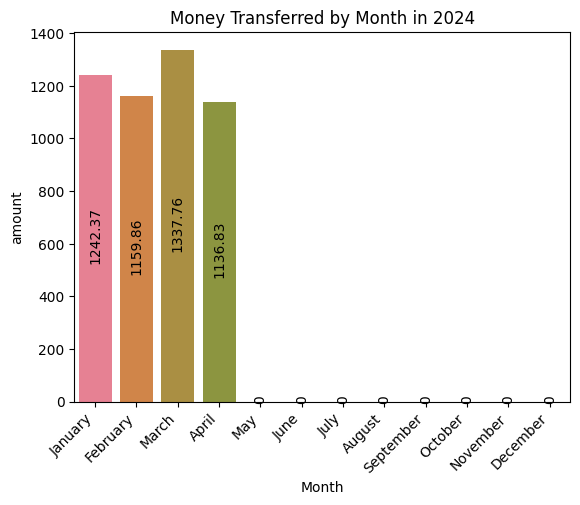

In [149]:
money_by_month(transfers)

There is clear growth in comparing year or year the growth of transactions

what is the amount of money being sent by quarter?

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/765620380.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




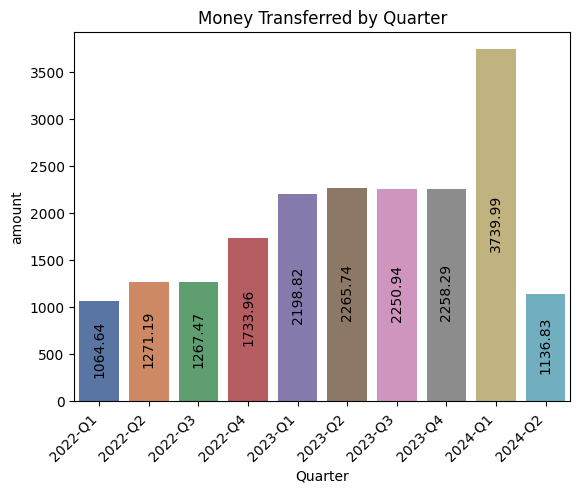

In [150]:
money_sent_by_quarter = transfers.groupby('Quarter')['amount'].sum().reset_index().sort_values('Quarter')
ax = sns.barplot(data = money_sent_by_quarter, x = 'Quarter', y = 'amount', legend = False, palette = 'deep')
for container in ax.containers:
    ax.bar_label(container, padding = 2, rotation = 90, label_type = 'center')
plt.title(f'Money Transferred by Quarter')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

## Transactions

In [151]:
transactions

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1
...,...,...,...,...,...,...,...
291,1147,Urban Outfitters Loft,934-954-3387,KittyKat,2.0,2.0,1
292,1147,Urban Outfitters Loft,934-954-3387,Colgatex,2.0,2.0,1
293,1148,Trader Tales,778-566-2709,Colgatex,3.0,3.0,1
294,1148,Trader Tales,778-566-2709,Krafty Cheddar,5.0,5.0,1


First thing we can do is make a column with the Total Price of each Item

In [152]:
transactions['Total Price'] = transactions['Price Per Item'] * transactions['Quantity']
transactions.head()

,Transaction ID,Store,Phone,Item,Price,Price Per Item,Quantity,Total Price
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1,5.0
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1,4.0
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2,8.0
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1,2.0
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1,3.0


In [153]:
people[people['telephone'] =='233-159-4158']	

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
795,854,Ffion,Knight,233-159-4158,Ffion.Knight@example.com,0,1,0,San Diego,USA


In [154]:
people[people['telephone'] =='725-427-2794']	

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
318,341,Alexandros,Green,725-427-2794,Alexandros.Green@example.com,0,1,0,San Diego,USA


In [155]:
people[people['telephone'] =='934-954-3387']

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
410,441,Conrad,Hanna,934-954-3387,Conrad.Hanna@example.com,0,1,1,San Diego,USA


After verifying if the phone numbers are in the people table, we can assume that the people are the owners of the business and we can grab the location of each business

In [156]:
trans = pd.merge(transactions.rename(columns = {'Phone':'telephone'}), people[['email', 'City', 'Country','telephone']], on='telephone', how = 'left')
trans.head()

,Transaction ID,Store,telephone,Item,Price,Price Per Item,Quantity,Total Price,email,City,Country
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1,5.0,Ffion.Knight@example.com,San Diego,USA
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1,4.0,Ffion.Knight@example.com,San Diego,USA
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2,8.0,Ffion.Knight@example.com,San Diego,USA
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1,2.0,Alexandros.Green@example.com,San Diego,USA
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1,3.0,Leroy.Barrera@example.com,New York,USA


What are the most popular items by store? what is the most sold item? what is the best selling item? what store had the most profit? what is the best selling item by city?

Let's start with the most profittable store

In [157]:
store_profits = trans.groupby('Store')['Total Price'].sum().reset_index().sort_values('Total Price', ascending = False)
store_profits

,Store,Total Price
4,Trader Tales,451.0
5,Urban Outfitters Loft,445.0
1,PetPals Mart,323.0
2,SparkMart,231.0
0,BestChoice Buy,221.0
3,Targeted Treasures,34.0


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




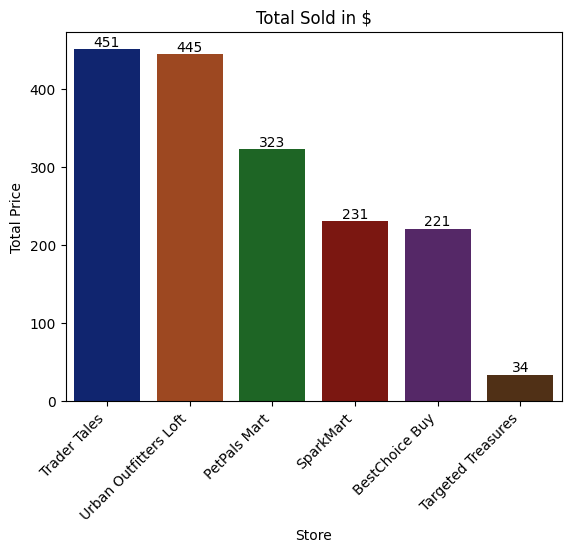

In [158]:
barplot(store_profits, 'Store', 'Total Price', 'Total Sold in $')


In [159]:
#What are the most popular items by store?
items_by_store = trans.groupby(['Store', 'Item'])['Total Price'].sum().reset_index()
items_by_store

,Store,Item,Total Price
0,BestChoice Buy,Colgatex,33.0
1,BestChoice Buy,Dovee,20.0
2,BestChoice Buy,Flixnet,44.0
3,BestChoice Buy,KittyKat,33.0
4,BestChoice Buy,Krafty Cheddar,35.0
5,BestChoice Buy,Oreoz,4.0
6,BestChoice Buy,Popsi,24.0
7,BestChoice Buy,RedCow,28.0
8,PetPals Mart,Coca-Splash,2.0
9,PetPals Mart,Colgatex,26.0


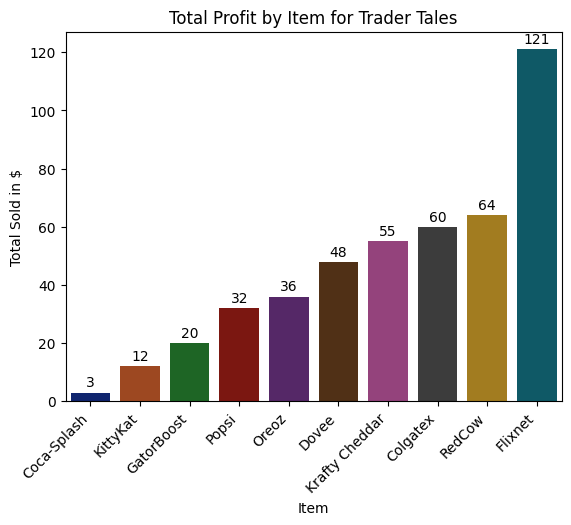

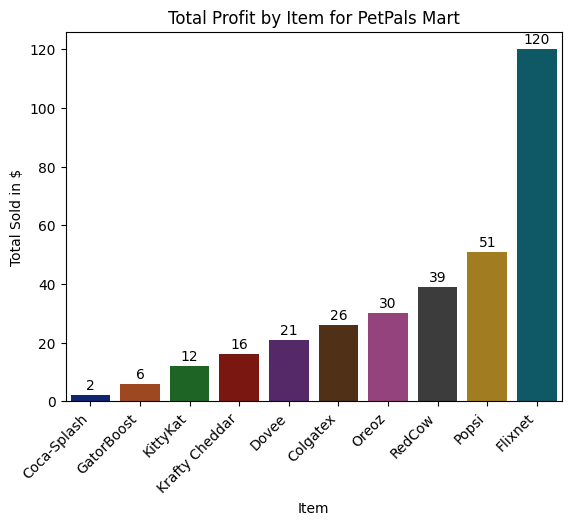

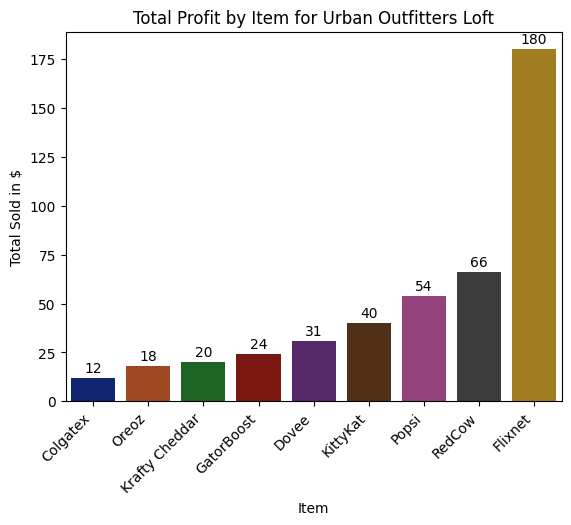

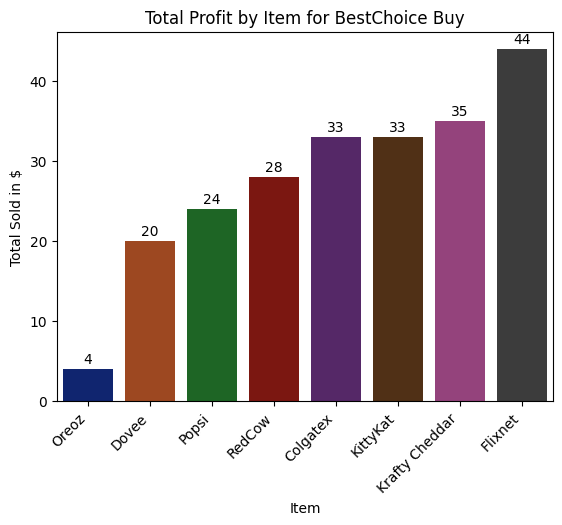

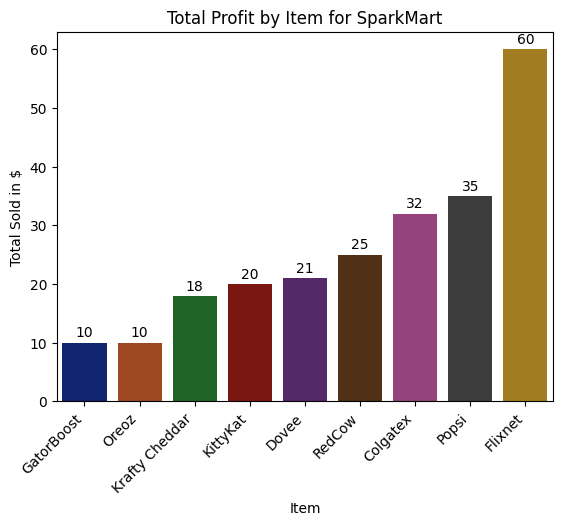

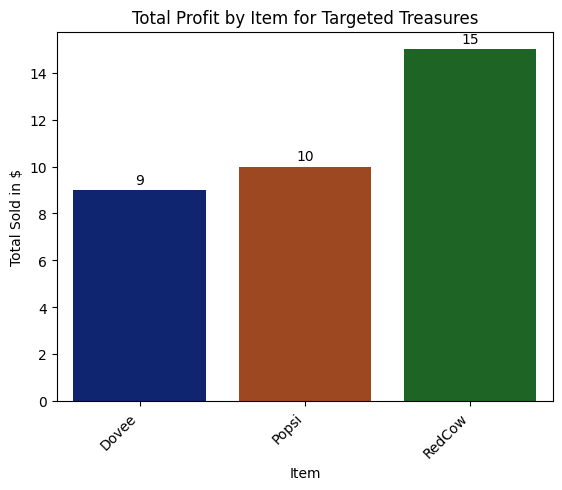

In [160]:
#getting the stores in a list to iterate over
stores = trans['Store'].unique()
for store in stores:
    #grouping by each item and getting the sum of the total price
    store_items = trans[trans['Store'] == store].groupby('Item')['Total Price'].sum().reset_index().sort_values('Total Price')
    ax = sns.barplot(data = store_items, x = 'Item', y = 'Total Price', legend = False, palette = 'dark', hue = 'Item')
    for container in ax.containers:
        ax.bar_label(container, padding = 2 )
    plt.title(f'Total Profit by Item for {store}')
    plt.xticks(rotation = 45, horizontalalignment = 'right')
    plt.ylabel('Total Sold in $')
    plt.show()

What is the most sold item?

In [161]:
items = trans.groupby('Item')['Quantity'].sum().reset_index().sort_values('Quantity')
items

,Item,Quantity
0,Coca-Splash,2
4,GatorBoost,17
7,Oreoz,28
6,Krafty Cheddar,30
5,KittyKat,46
3,Flixnet,50
1,Colgatex,58
8,Popsi,58
9,RedCow,66
2,Dovee,96


/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




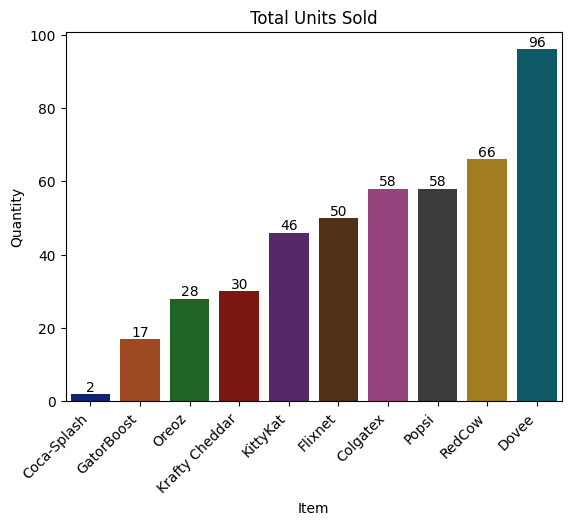

In [162]:
barplot(items, 'Item', 'Quantity', 'Total Units Sold')

/var/folders/gg/s8s9kxn56pb7b1d62zg07jsm0000gn/T/ipykernel_31980/987410296.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




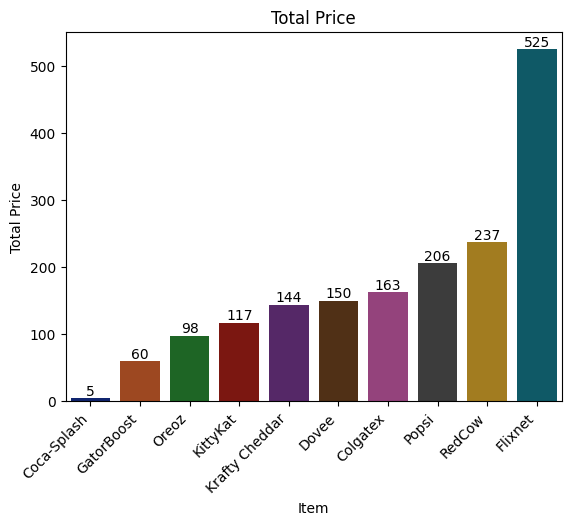

In [163]:
#getting the total item profit
item_profit = trans.groupby('Item')['Total Price'].sum().reset_index().sort_values('Total Price')
barplot(item_profit, 'Item', 'Total Price', 'Total Price')

Whats the most profitable items by country?

In [164]:
countries_trans = trans['Country'].unique()
countries_trans

array(['USA'], dtype=object)

The transactions are only in the USA so we will zoom into the cities

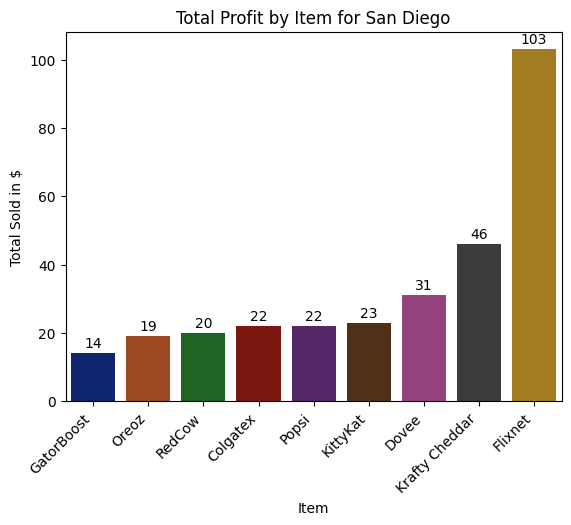

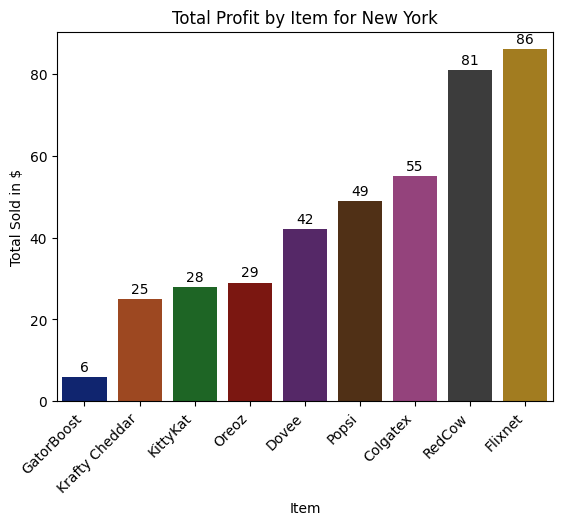

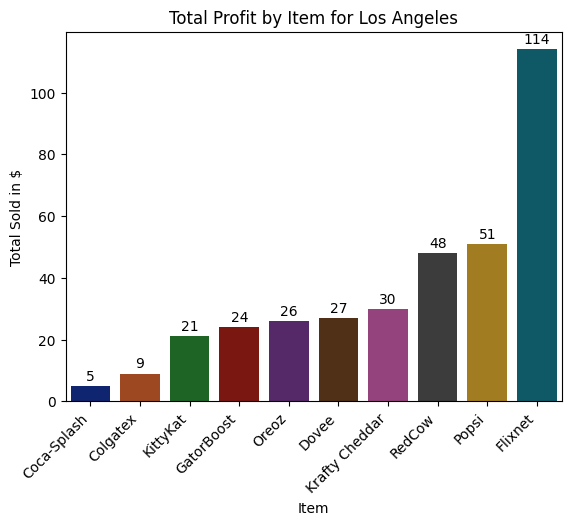

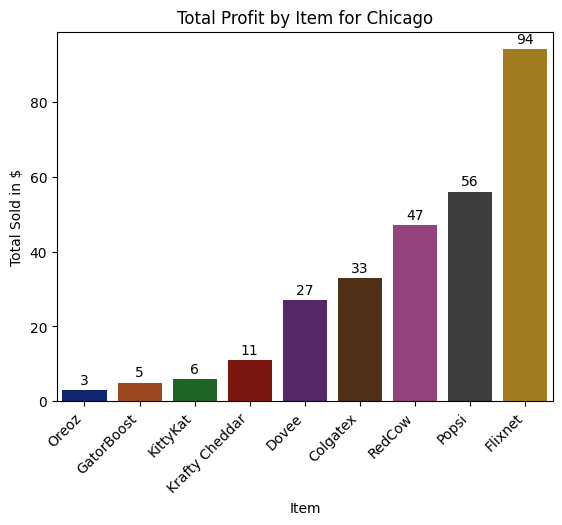

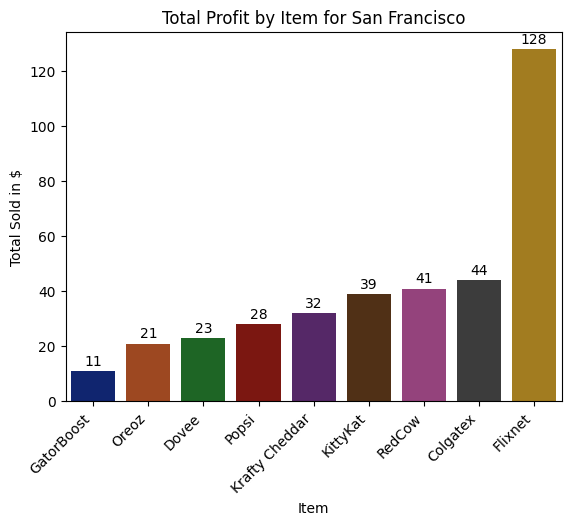

In [165]:
citiess_trans = trans['City'].unique()
for city in citiess_trans:
    store_items = trans[trans['City'] == city].groupby('Item')['Total Price'].sum().reset_index().sort_values('Total Price')
    ax = sns.barplot(data = store_items, x = 'Item', y = 'Total Price', legend = False, palette = 'dark', hue = 'Item')
    for container in ax.containers:
        ax.bar_label(container, padding = 2 )
    plt.title(f'Total Profit by Item for {city}')
    plt.xticks(rotation = 45, horizontalalignment = 'right')
    plt.ylabel('Total Sold in $')
    plt.show()

This concludes the EDA process for our 5 files

Now we will store the files in a S3 bucket on AWS for later use if needed

In [1]:
#AWS SDK
import boto3

In [246]:
#checking which dataframe we want to store for later use
people.head()

,id,first_name,last_name,telephone,email,Android,IPhone,Desktop,City,Country
0,1,Jamie,Bright,533-849-3913,Jamie.Bright@example.com,1,0,0,Montreal,Canada
1,2,Arabella,Knox,652-272-9539,Arabella.Knox@example.com,1,1,0,Los Angeles,USA
2,3,Yusra,Fletcher,385-702-8874,Yusra.Fletcher@example.com,1,1,1,Toronto,Canada
3,4,Esme,Nielsen,621-797-5367,Esme.Nielsen@example.com,1,1,0,Los Angeles,USA
4,6,Dean,Lewis,243-955-3782,Dean.Lewis@example.com,1,1,1,San Diego,USA


In [257]:
transactions = trans
transactions.head()

,Transaction ID,Store,telephone,Item,Price,Price Per Item,Quantity,Total Price,email,City,Country
0,1000,Trader Tales,233-159-4158,Krafty Cheddar,5.0,5.0,1,5.0,Ffion.Knight@example.com,San Diego,USA
1,1000,Trader Tales,233-159-4158,Popsi,4.0,4.0,1,4.0,Ffion.Knight@example.com,San Diego,USA
2,1000,Trader Tales,233-159-4158,Oreoz,8.0,4.0,2,8.0,Ffion.Knight@example.com,San Diego,USA
3,1001,PetPals Mart,725-427-2794,Colgatex,2.0,2.0,1,2.0,Alexandros.Green@example.com,San Diego,USA
4,1002,Trader Tales,659-190-9378,Colgatex,3.0,3.0,1,3.0,Leroy.Barrera@example.com,New York,USA


In [251]:
promotions = promotion_locations
promotions.head()

,id,email,telephone,promotion,responded,City,Country,Android,IPhone,Desktop
0,1,Emelia.Page@example.com,929-575-4315,Coca-Splash,Yes,San Francisco,USA,0,1,1
1,2,Myrtle.Doyle@example.com,525-796-7991,GatorBoost,Yes,Toronto,Canada,1,1,1
2,3,Huw.Valentine@example.com,441-847-1955,Oreoz,Yes,Chicago,USA,0,1,1
3,4,Alessandro.French@example.com,216-516-1958,Popsi,Yes,San Diego,USA,1,0,1
4,5,Isobelle.Davidson@example.com,237-295-4490,Popsi,Yes,San Francisco,USA,0,1,0


Now that we have our aggregated datasets we can turn them into csv files and store them in a s3 bucket for later use

In [258]:
#downloading files to visualize
people.to_csv('people.csv', index = False)
transactions.to_csv('transactions.csv', index = False)
promotions.to_csv('promotions.csv', index = False)
transfers.to_csv('transfers.csv', index = False)

In [262]:
#setting up client
bucket_name = 'venmitoarchive'
s3_client = boto3.client('s3')

#uploading files
s3_client.upload_file('./people.csv', bucket_name, 'people.csv')
s3_client.upload_file('./transactions.csv', bucket_name, 'transactions.csv')
s3_client.upload_file('./promotions.csv', bucket_name, 'promotions.csv')
s3_client.upload_file('./transfers.csv', bucket_name, 'transfers.csv')

All these files are uploaded to an s3 bucket where versioning is turned on which allows for later use if needed